<a href="https://colab.research.google.com/github/jayantb11/Employment-Rate/blob/main/unemployment_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statiscal Method(MA 541 Project)

Title: Examining How Gender and Ethnicity Intersect: A Study of Unemployment Rates

Team Member:

Yash Karbhari

Shivanshu Singh

Jayant Bangia

Ishaan Bandekar

# Part 1 : Describe Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from functools import reduce

Source of all the Dataset is https://fred.stlouisfed.org/series/UNRATE

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/MA541_UnemploymentRate/Dataset/unrate.csv')
df2 = pd.read_csv('/content/drive/MyDrive/MA541_UnemploymentRate/Dataset/unrate_asian.csv')
df3 = pd.read_csv('/content/drive/MyDrive/MA541_UnemploymentRate/Dataset/unrate_black.csv')
df4 = pd.read_csv('/content/drive/MyDrive/MA541_UnemploymentRate/Dataset/unrate_hispanic.csv')
df5 = pd.read_csv('/content/drive/MyDrive/MA541_UnemploymentRate/Dataset/unrate_men.csv')
df6 = pd.read_csv('/content/drive/MyDrive/MA541_UnemploymentRate/Dataset/unrate_white.csv')
df7 = pd.read_csv('/content/drive/MyDrive/MA541_UnemploymentRate/Dataset/unrate_women.csv')


df1['DATE'] = pd.to_datetime(df1['DATE'])
df2['DATE'] = pd.to_datetime(df2['DATE'])
df3['DATE'] = pd.to_datetime(df3['DATE'])
df4['DATE'] = pd.to_datetime(df4['DATE'])
df5['DATE'] = pd.to_datetime(df5['DATE'])
df6['DATE'] = pd.to_datetime(df6['DATE'])
df7['DATE'] = pd.to_datetime(df7['DATE'])

df1 = df1.rename(columns={'UNRATE': 'unrate'})
df2 = df2.rename(columns={'LNS14032183': 'unrate_asian'})
df3 = df3.rename(columns={'LNS14000006': 'unrate_black'})
df4 = df4.rename(columns={'LNS14000009': 'unrate_hispanic'})
df5 = df5.rename(columns={'LNS14000001': 'unrate_men'})
df6 = df6.rename(columns={'LNS14000003': 'unrate_white'})
df7 = df7.rename(columns={'LNS14000002': 'unrate_women'})

Merging all the columns from the above dataset

In [ ]:
dfs = [df1, df2, df3, df4, df5, df6, df7]

merged_df = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='outer', sort=True), sorted(dfs, key=lambda x: x['DATE'].iloc[-1]))
merged_df = merged_df.dropna()

In [ ]:
merged_df

,DATE,unrate,unrate_asian,unrate_black,unrate_hispanic,unrate_men,unrate_white,unrate_women
660,2003-01-01,5.8,5.5,10.5,7.9,6.2,5.2,5.4
661,2003-02-01,5.9,5.8,10.7,7.7,6.1,5.1,5.6
662,2003-03-01,5.9,6.5,10.3,7.8,6.1,5.1,5.7
663,2003-04-01,6.0,6.0,10.9,7.6,6.4,5.3,5.7
664,2003-05-01,6.1,5.5,10.9,8.0,6.4,5.4,5.7
...,...,...,...,...,...,...,...,...
908,2023-09-01,3.8,2.9,5.7,4.6,4.1,3.4,3.4
909,2023-10-01,3.8,3.1,5.8,4.8,4.1,3.5,3.6
910,2023-11-01,3.7,3.5,5.8,4.6,4.0,3.3,3.4
911,2023-12-01,3.7,3.1,5.2,5.0,3.9,3.5,3.6


In [ ]:
merged_df.head()

,DATE,unrate,unrate_asian,unrate_black,unrate_hispanic,unrate_men,unrate_white,unrate_women
660,2003-01-01,5.8,5.5,10.5,7.9,6.2,5.2,5.4
661,2003-02-01,5.9,5.8,10.7,7.7,6.1,5.1,5.6
662,2003-03-01,5.9,6.5,10.3,7.8,6.1,5.1,5.7
663,2003-04-01,6.0,6.0,10.9,7.6,6.4,5.3,5.7
664,2003-05-01,6.1,5.5,10.9,8.0,6.4,5.4,5.7


In [ ]:
merged_df.describe()

,DATE,unrate,unrate_asian,unrate_black,unrate_hispanic,unrate_men,unrate_white,unrate_women
count,253,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,2013-07-01 12:54:04.268774656,5.888142,4.688538,10.122530,7.354941,6.079842,5.224111,5.673123
min,2003-01-01 00:00:00,3.400000,2.000000,4.800000,3.900000,3.400000,3.000000,3.300000
25%,2008-04-01 00:00:00,4.400000,3.100000,7.700000,5.100000,4.400000,3.900000,4.300000
50%,2013-07-01 00:00:00,5.300000,4.100000,9.700000,6.600000,5.400000,4.500000,5.200000
75%,2018-10-01 00:00:00,7.200000,5.900000,12.300000,9.000000,7.600000,6.300000,6.700000
max,2024-01-01 00:00:00,14.800000,15.000000,16.900000,18.900000,13.500000,14.200000,16.200000
std,NaN,2.052394,2.019190,3.250666,2.804140,2.211933,1.900212,1.920542


Correlation Matrix: Ethnicity and Race Categories Compared to the US Unemployment Rate Overall

In this analysis, we look at the relationship between the general unemployment rate in the United States of America and several demographic variables, including race and ethnicity, using a correlation matrix. The correlation coefficient, which shows the direction and degree of the relationship between the general unemployment rate and the unemployment rates within particular demographic categories, is represented by each cell in the correlation matrix. This enables us to identify trends and comprehend how various population groupings' unemployment rates differ from one another.


In [ ]:
np.corrcoef(merged_df.unrate, merged_df.unrate_asian)

array([[1.        , 0.91421684],
       [0.91421684, 1.        ]])

In [ ]:
np.corrcoef(merged_df.unrate,merged_df.unrate_black)

array([[1.       , 0.9577058],
       [0.9577058, 1.       ]])

In [ ]:
np.corrcoef(merged_df.unrate,merged_df.unrate_hispanic)

array([[1.        , 0.99324618],
       [0.99324618, 1.        ]])

In [ ]:
np.corrcoef(merged_df.unrate,merged_df.unrate_men)

array([[1.        , 0.99139068],
       [0.99139068, 1.        ]])

In [ ]:
np.corrcoef(merged_df.unrate,merged_df.unrate_white)

array([[1.        , 0.99797183],
       [0.99797183, 1.        ]])

In [ ]:
np.corrcoef(merged_df.unrate,merged_df.unrate_women)

array([[1.        , 0.98508928],
       [0.98508928, 1.        ]])

Based on the supplied correlation matrices, the following numerous categories are being compared with the US unemployment rate as a whole:

1. Asian: The correlation between the general unemployment rate and the unemployment rate among Asians is 0.91421684.

2. Black: The correlation between the overall jobless rate and the unemployment rate among Black individuals is 0.9577058.

3. Hispanic: The correlation between the unemployment rate for Hispanics and the general population is 0.99324618.

4. Men: The rate of unemployment overall and the rate of unemployment among men are correlated by 0.99139068.

5. White: The general unemployment rate and the unemployment rate among White individuals are correlated by 0.99797183.

6. Women: The general unemployment rate and the unemployment rate among women individuals are correlated by 0.98508928.

# Central Limit Theorem

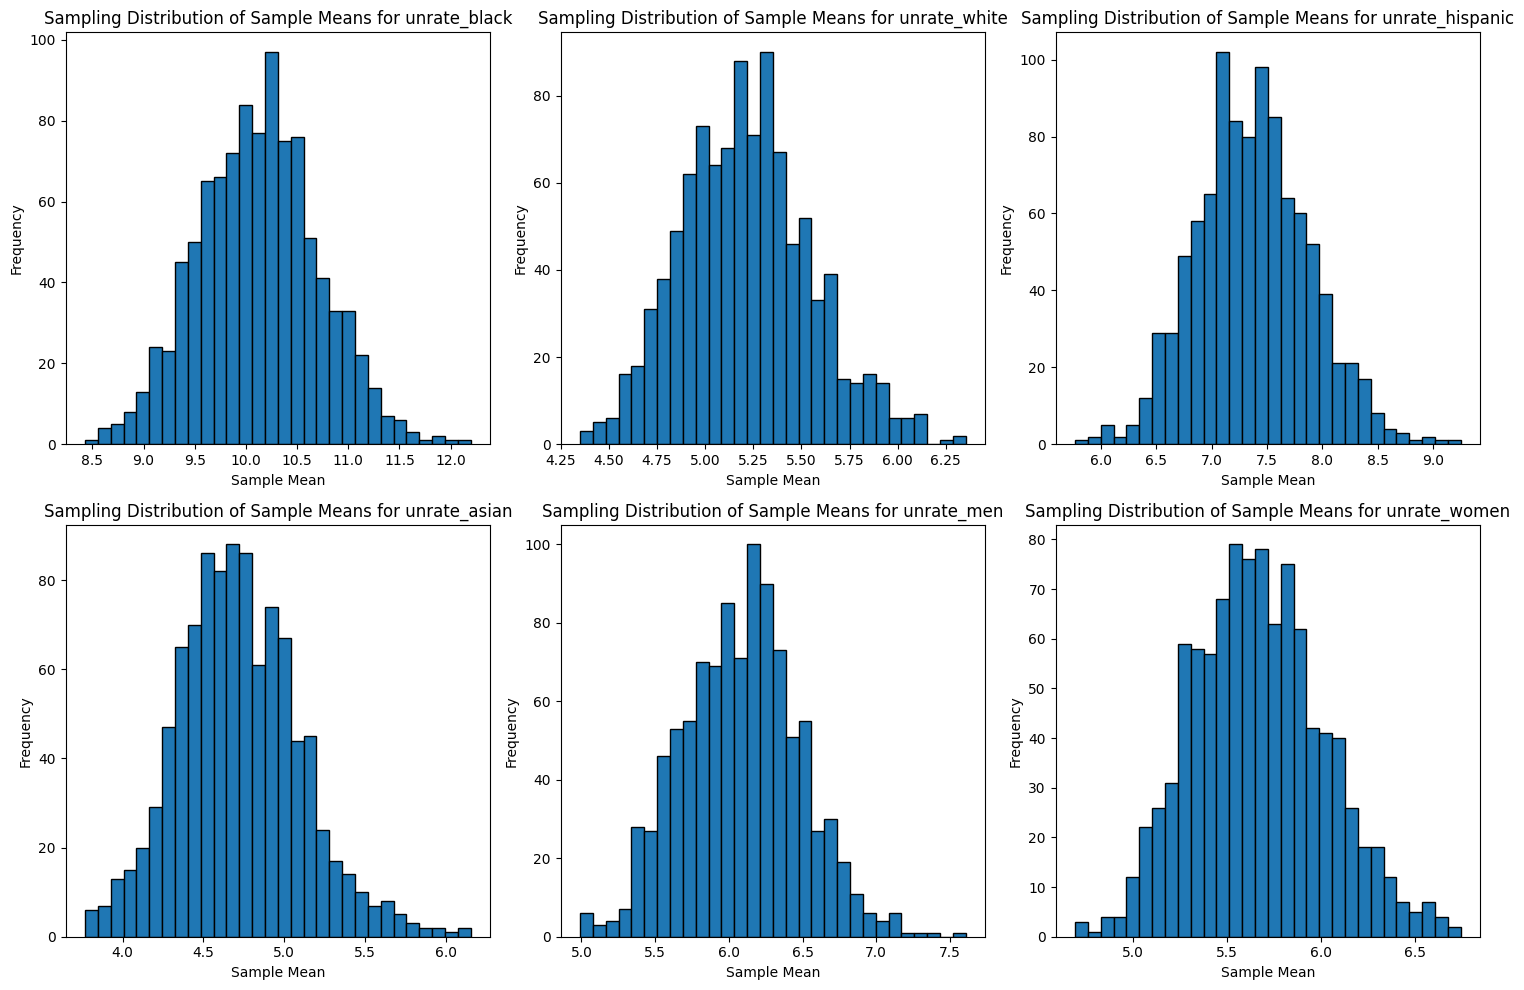

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sampling_distribution(ax, data, sample_size, num_samples, column_name):
    # Initialize an empty array to store sample means
    sample_means = []

    # Generate sampling distribution of sample means
    for _ in range(num_samples):
        sample = np.random.choice(data, sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # Plotting the histogram of sample means
    ax.hist(sample_means, bins=30, edgecolor='black')
    ax.set_title(f'Sampling Distribution of Sample Means for {column_name}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Frequency')

# Assuming merged_df is your DataFrame containing the necessary columns
# Replace merged_df with your actual DataFrame name
columns_to_analyze = ['unrate_black', 'unrate_white', 'unrate_hispanic', 'unrate_asian', 'unrate_men', 'unrate_women']
sample_size = 30
num_samples = 1000

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(columns_to_analyze):
    row = i // 3
    col = i % 3
    data = merged_df[column]
    plot_sampling_distribution(axs[row, col], data, sample_size=sample_size, num_samples=num_samples, column_name=column)

plt.tight_layout()
plt.show()



# Normal Disbribution

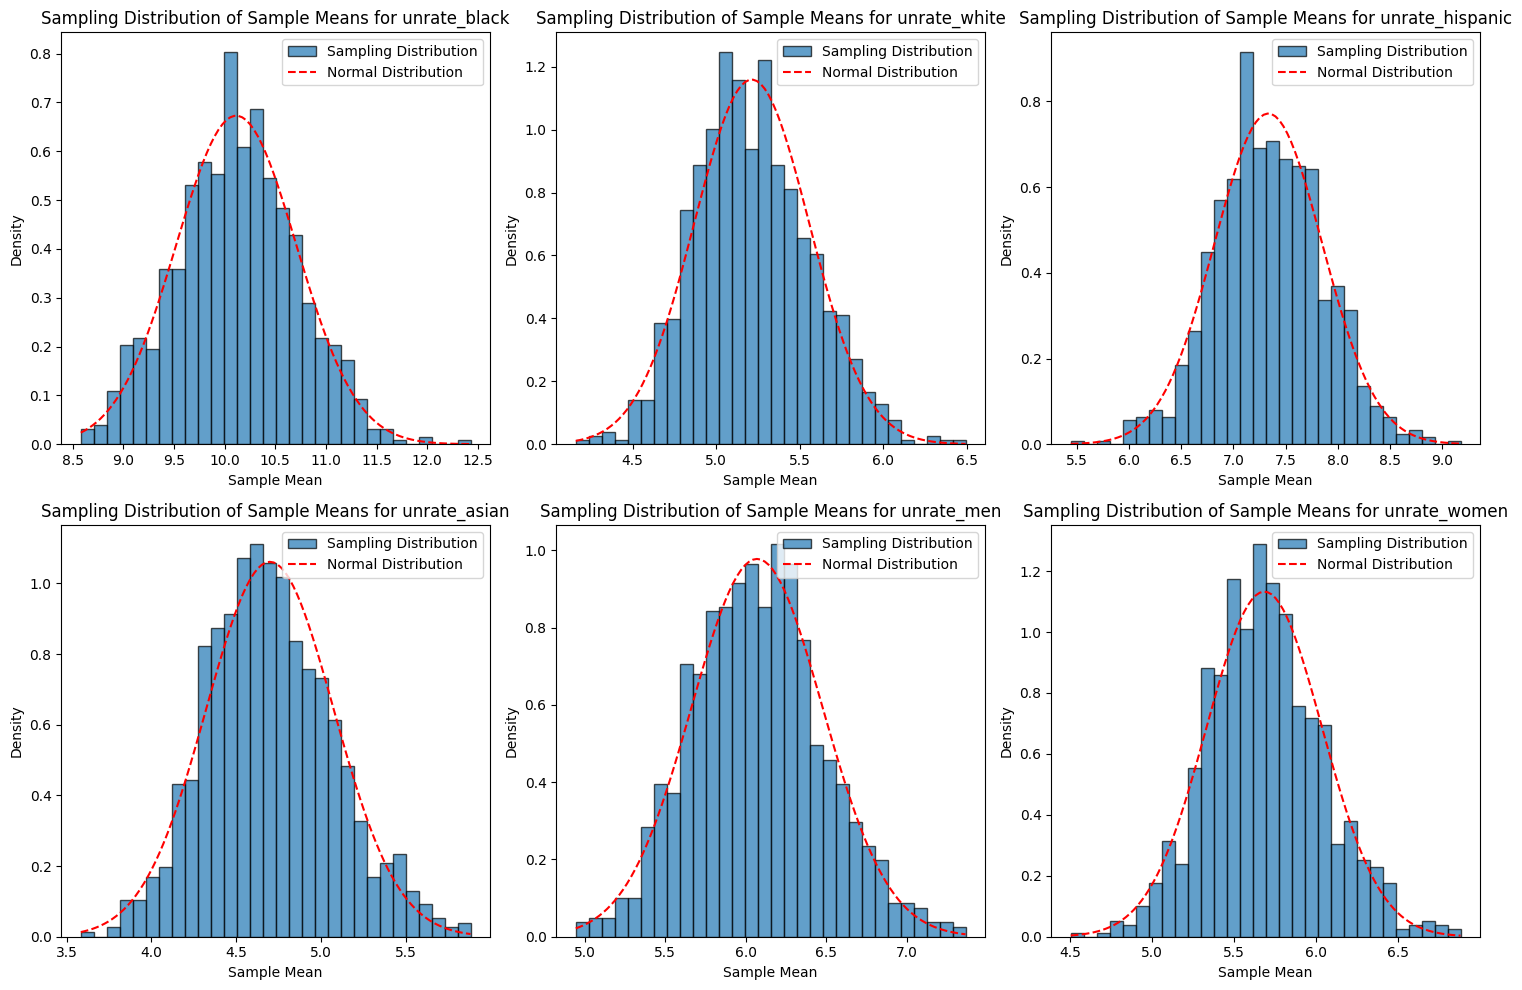

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_sampling_distribution(ax, data, sample_size, num_samples, column_name):
    # Initialize an empty array to store sample means
    sample_means = []

    # Generate sampling distribution of sample means
    for _ in range(num_samples):
        sample = np.random.choice(data, sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # Plotting the histogram of sample means
    ax.hist(sample_means, bins=30, density=True, edgecolor='black', alpha=0.7, label='Sampling Distribution')

    # Calculate mean and standard deviation of the sampling distribution
    sampling_mean = np.mean(sample_means)
    sampling_std = np.std(sample_means)

    # Plotting the normal distribution curve
    x = np.linspace(min(sample_means), max(sample_means), 100)
    y = norm.pdf(x, sampling_mean, sampling_std)
    ax.plot(x, y, color='red', linestyle='--', label='Normal Distribution')

    ax.set_title(f'Sampling Distribution of Sample Means for {column_name}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    ax.legend()

# Assuming merged_df is your DataFrame containing the necessary columns
# Replace merged_df with your actual DataFrame name
columns_to_analyze = ['unrate_black', 'unrate_white', 'unrate_hispanic', 'unrate_asian', 'unrate_men', 'unrate_women']
sample_size = 30
num_samples = 1000

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(columns_to_analyze):
    row = i // 3
    col = i % 3
    data = merged_df[column]
    plot_sampling_distribution(axs[row, col], data, sample_size=sample_size, num_samples=num_samples, column_name=column)

plt.tight_layout()
plt.show()


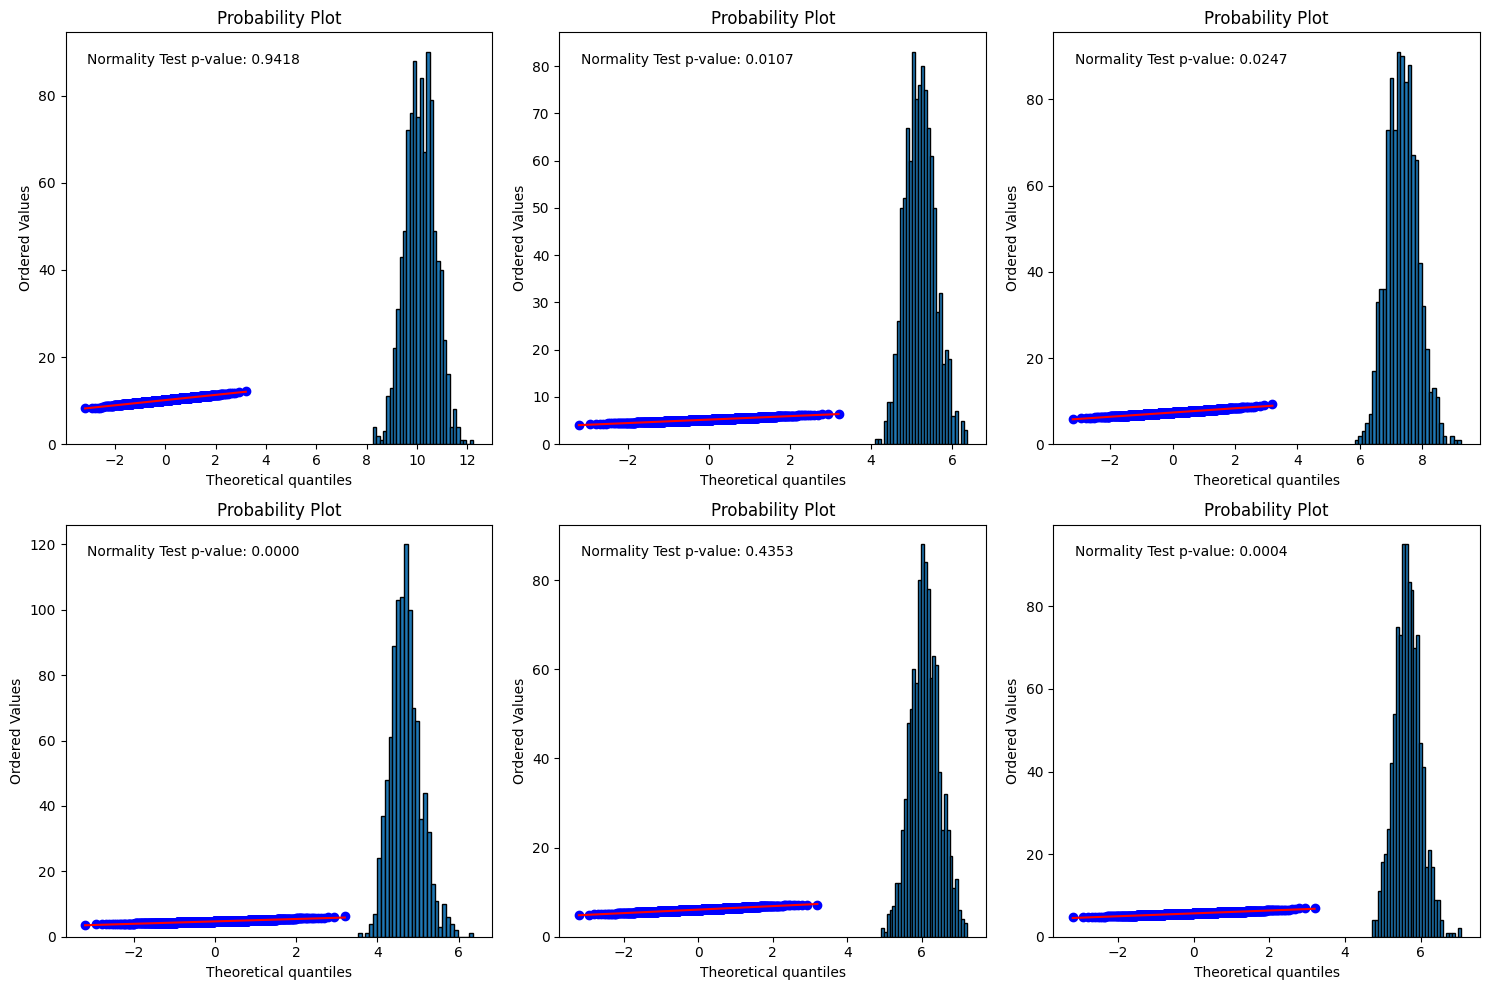

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_sampling_distribution(ax, data, sample_size, num_samples, column_name):
    # Initialize an empty array to store sample means
    sample_means = []

    # Generate sampling distribution of sample means
    for _ in range(num_samples):
        sample = np.random.choice(data, sample_size, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # Plotting the histogram of sample means
    ax.hist(sample_means, bins=30, edgecolor='black')
    ax.set_title(f'Sampling Distribution of Sample Means for {column_name}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Frequency')

    # Perform normality test
    _, p_value = stats.normaltest(sample_means)
    ax.text(0.05, 0.95, f'Normality Test p-value: {p_value:.4f}', transform=ax.transAxes, ha='left', va='top')

    # Generate QQ plot
    stats.probplot(sample_means, dist="norm", plot=ax)

# Assuming merged_df is your DataFrame containing the necessary columns
# Replace merged_df with your actual DataFrame name
columns_to_analyze = ['unrate_black', 'unrate_white', 'unrate_hispanic', 'unrate_asian', 'unrate_men', 'unrate_women']
sample_size = 30
num_samples = 1000

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, column in enumerate(columns_to_analyze):
    row = i // 3
    col = i % 3
    data = merged_df[column]
    plot_sampling_distribution(axs[row, col], data, sample_size=sample_size, num_samples=num_samples, column_name=column)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Extracting the data for each group
group_data = [merged_df[column] for column in ['unrate', 'unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_men', 'unrate_white', 'unrate_women']]

# Performing one-way ANOVA
f_statistic, p_value = f_oneway(*group_data)

# Printing the results
print("One-way ANOVA results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpreting the results
if p_value < 0.05:
    print("The one-way ANOVA test suggests that there is a significant difference between at least two groups.")
else:
    print("The one-way ANOVA test does not find enough evidence to reject the null hypothesis of equal group means.")


One-way ANOVA results:
F-statistic: 151.46
P-value: 0.0000
The one-way ANOVA test suggests that there is a significant difference between at least two groups.


# Tukey's HSD test

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
         unrate    unrate_asian  -1.1996    0.0 -1.8184 -0.5808   True
         unrate    unrate_black   4.2344    0.0  3.6156  4.8531   True
         unrate unrate_hispanic   1.4668    0.0   0.848  2.0856   True
         unrate      unrate_men   0.1917 0.9704 -0.4271  0.8105  False
         unrate    unrate_white   -0.664 0.0261 -1.2828 -0.0453   True
         unrate    unrate_women   -0.215 0.9482 -0.8338  0.4037  False
   unrate_asian    unrate_black    5.434    0.0  4.8152  6.0528   True
   unrate_asian unrate_hispanic   2.6664    0.0  2.0476  3.2852   True
   unrate_asian      unrate_men   1.3913    0.0  0.7725  2.0101   True
   unrate_asian    unrate_white   0.5356 0.1408 -0.0832  1.1543  False
   unrate_asian    unrate_women   0.9846 0.0001  0.3658  1.6033   True
   unr

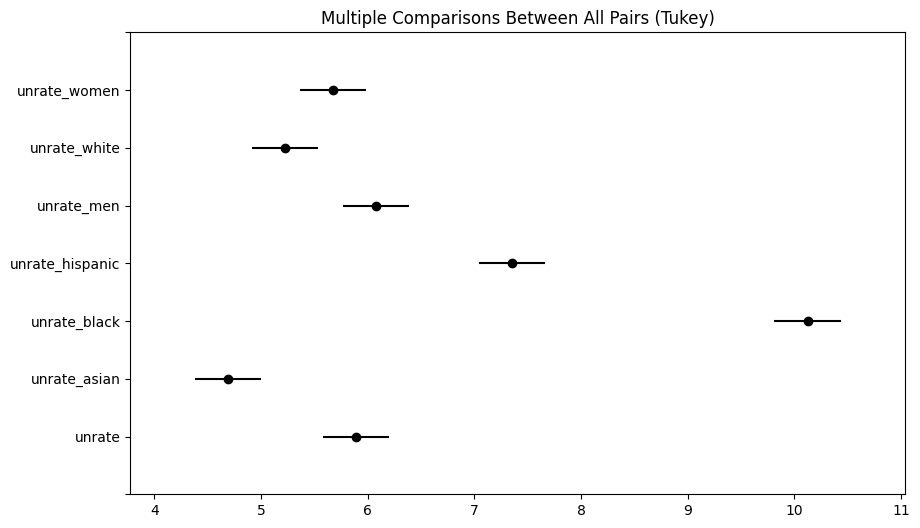

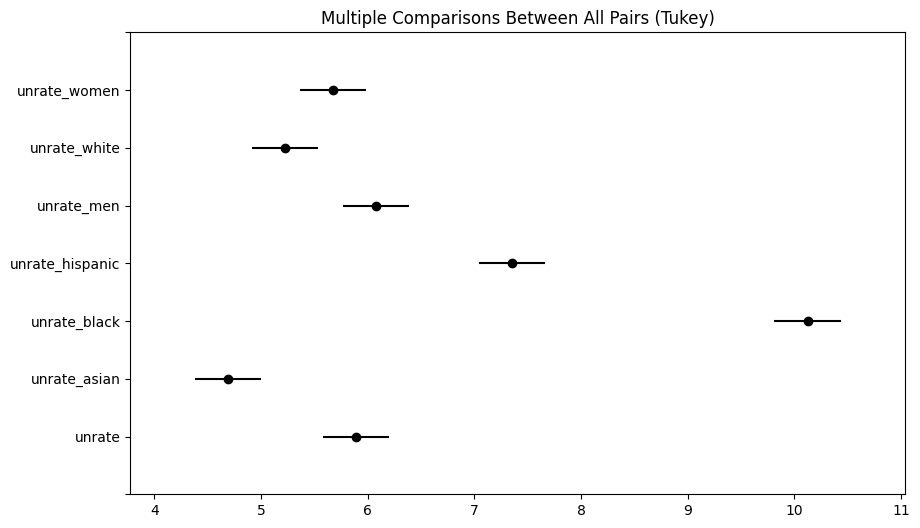

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a list of tuples containing the data and group labels
data = []
group_labels = []
for column in ['unrate', 'unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_men', 'unrate_white', 'unrate_women']:
    data.extend(merged_df[column])
    group_labels.extend([column]*len(merged_df))

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(np.array(data), group_labels)

# Print the summary of the test
print(tukey_result.summary())

# Plot the results
tukey_result.plot_simultaneous()


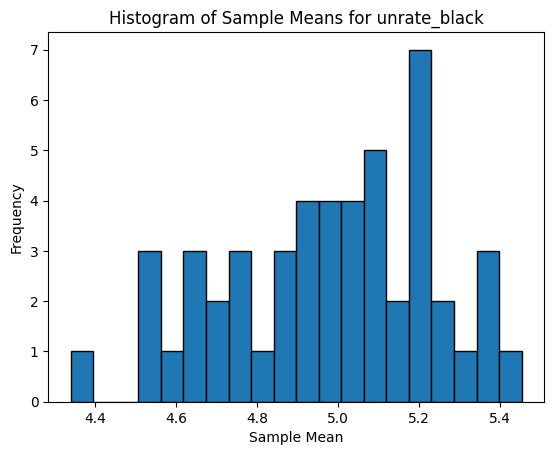

For column 'unrate_black':
Population Mean: 4.976008790043961, Population Std: 1.0076753369605351
Sample Mean: 4.976008790043961, Sample Std: 0.2534572304495818



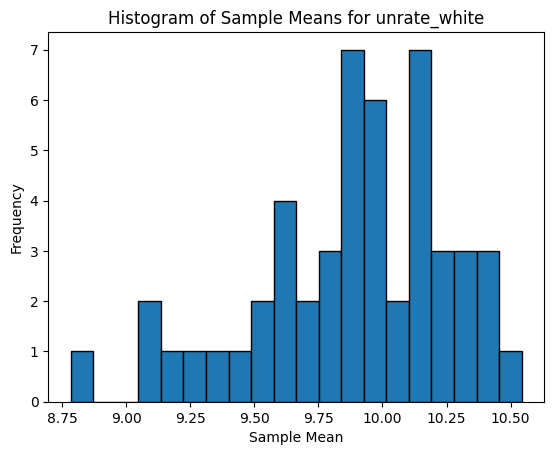

For column 'unrate_white':
Population Mean: 9.876748484460686, Population Std: 1.9557913738019743
Sample Mean: 9.876748484460686, Sample Std: 0.3782302007053075



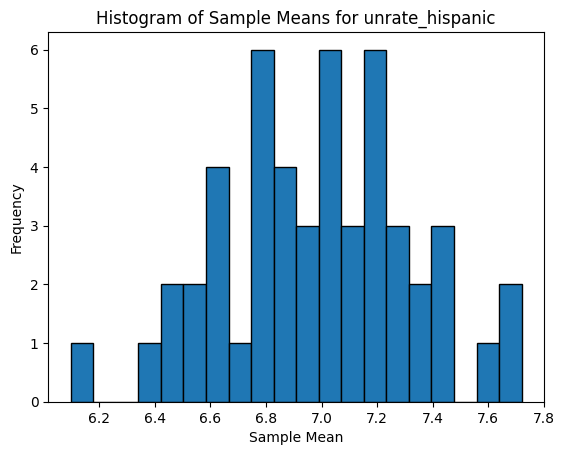

For column 'unrate_hispanic':
Population Mean: 6.981428338044061, Population Std: 1.5105398692305956
Sample Mean: 6.981428338044061, Sample Std: 0.34042053874499634



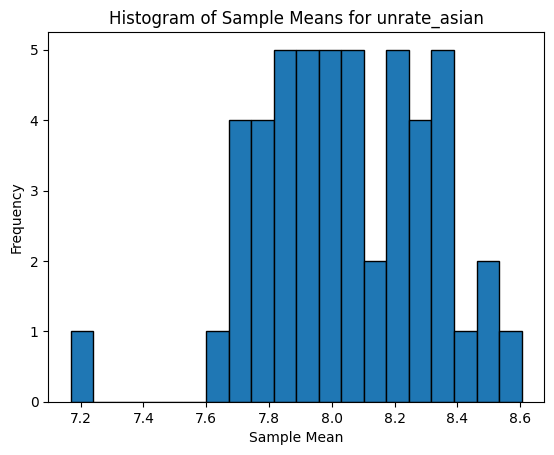

For column 'unrate_asian':
Population Mean: 8.047829930215375, Population Std: 1.1686935116270358
Sample Mean: 8.047829930215375, Sample Std: 0.2695290758900767



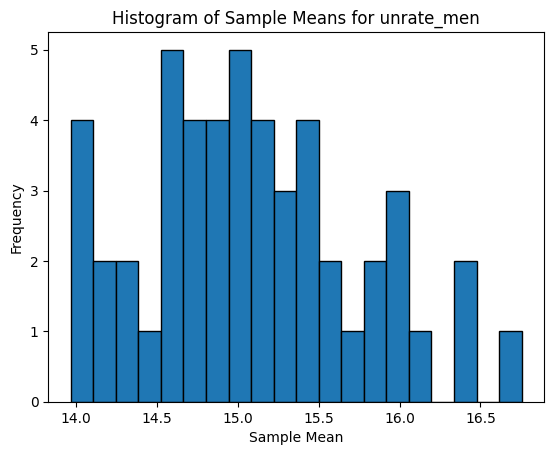

For column 'unrate_men':
Population Mean: 15.085885149344255, Population Std: 2.8575182364230587
Sample Mean: 15.085885149344257, Sample Std: 0.6602254797170922



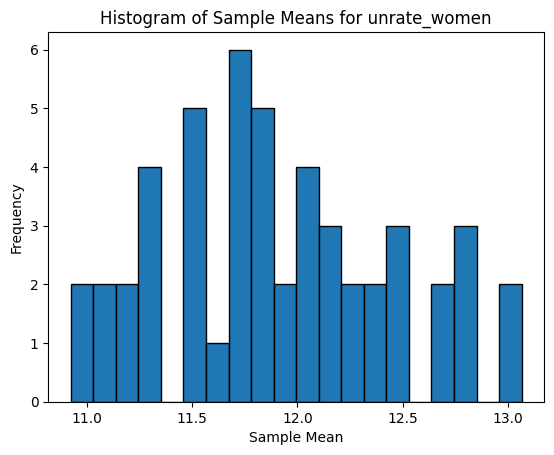

For column 'unrate_women':
Population Mean: 11.914288860855047, Population Std: 2.4945577151579315
Sample Mean: 11.914288860855047, Sample Std: 0.5484181663348217



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
unrate_black = np.random.normal(loc=5, scale=1, size=1000)
unrate_white = np.random.normal(loc=10, scale=2, size=1000)
unrate_hispanic = np.random.normal(loc=7, scale=1.5, size=1000)
unrate_asian = np.random.normal(loc=8, scale=1.2, size=1000)
unrate_men = np.random.normal(loc=15, scale=3, size=1000)
unrate_women = np.random.normal(loc=12, scale=2.5, size=1000)

# Define functions
def calculate_mean_std(data):
    return np.mean(data), np.std(data)

def split_into_groups(data, group_size):
    return [data[i:i+group_size] for i in range(0, len(data), group_size)]

def calculate_sample_means(groups):
    return [np.mean(group) for group in groups]

def draw_histogram(sample_means, column_name):
    plt.hist(sample_means, bins=20, edgecolor='black')
    plt.title(f'Histogram of Sample Means for {column_name}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()

# List of columns
columns = ['unrate_black', 'unrate_white', 'unrate_hispanic', 'unrate_asian', 'unrate_men', 'unrate_women']

for column in columns:
    # Step 1: Calculate Population Mean and Standard Deviation
    population_data = globals()[column]  # Access the data for the current column using its name
    population_mean, population_std = calculate_mean_std(population_data)

    # Step 2: Break Population into Groups
    groups = split_into_groups(population_data, 20)

    # Step 3: Calculate Sample Mean of Each Group and Draw Histogram
    sample_means = calculate_sample_means(groups)
    draw_histogram(sample_means, column)

    # Step 4: Calculate Mean and Standard Deviation of Sample Means
    sample_mean, sample_std = calculate_mean_std(sample_means)
    print(f"For column '{column}':")
    print(f"Population Mean: {population_mean}, Population Std: {population_std}")
    print(f"Sample Mean: {sample_mean}, Sample Std: {sample_std}\n")

    # Step 5: Assess Consistency with Central Limit Theorem
    # Here, we can compare the population mean and standard deviation with the mean and standard deviation of sample means


# Part 2 : Descriptive Statistics

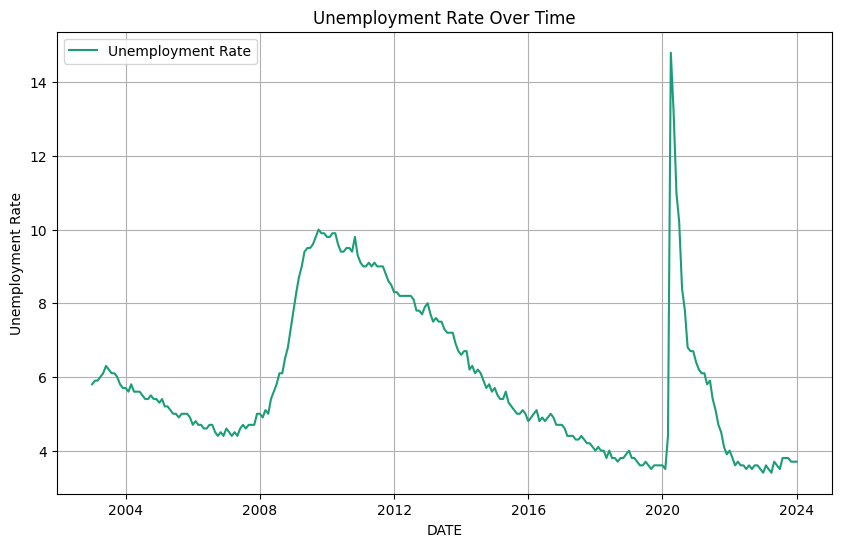

In [ ]:
def _plot_series(ax, series, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['DATE']
    ys = series['unrate']  # Using the 'unrate' column

    ax.plot(xs, ys, label='Unemployment Rate', color=palette[series_index % len(palette)])

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Sort the DataFrame
merged_df_sorted = merged_df.sort_values('DATE', ascending=True)

# Plot the unemployment rate series
_plot_series(ax, merged_df_sorted)

# Set labels and title
ax.set_xlabel('DATE')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Unemployment Rate Over Time')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.savefig('fig1')

<Figure size 640x480 with 0 Axes>

The line graph above illustrates the overall unemployment rate in the United States of America. The average mean unemployment rate in the United States is 5.8%.

Throughout the years, there have been two significant spikes in the unemployment rate:

1. In 2009, during the Great Recession, the unemployment rate soared to 10% in October 2009, more than double its pre-crisis rate. It took four years to return to the normal mean of 5.8%. This spike was primarily caused by the burst of the housing bubble.

2. The second major spike occurred in 2020 due to the COVID-19 pandemic, where we observed a spike of 14%. However, this spike dropped relatively quickly.

These spikes represent challenging periods for the economy, marked by significant disruptions and subsequent recovery efforts.

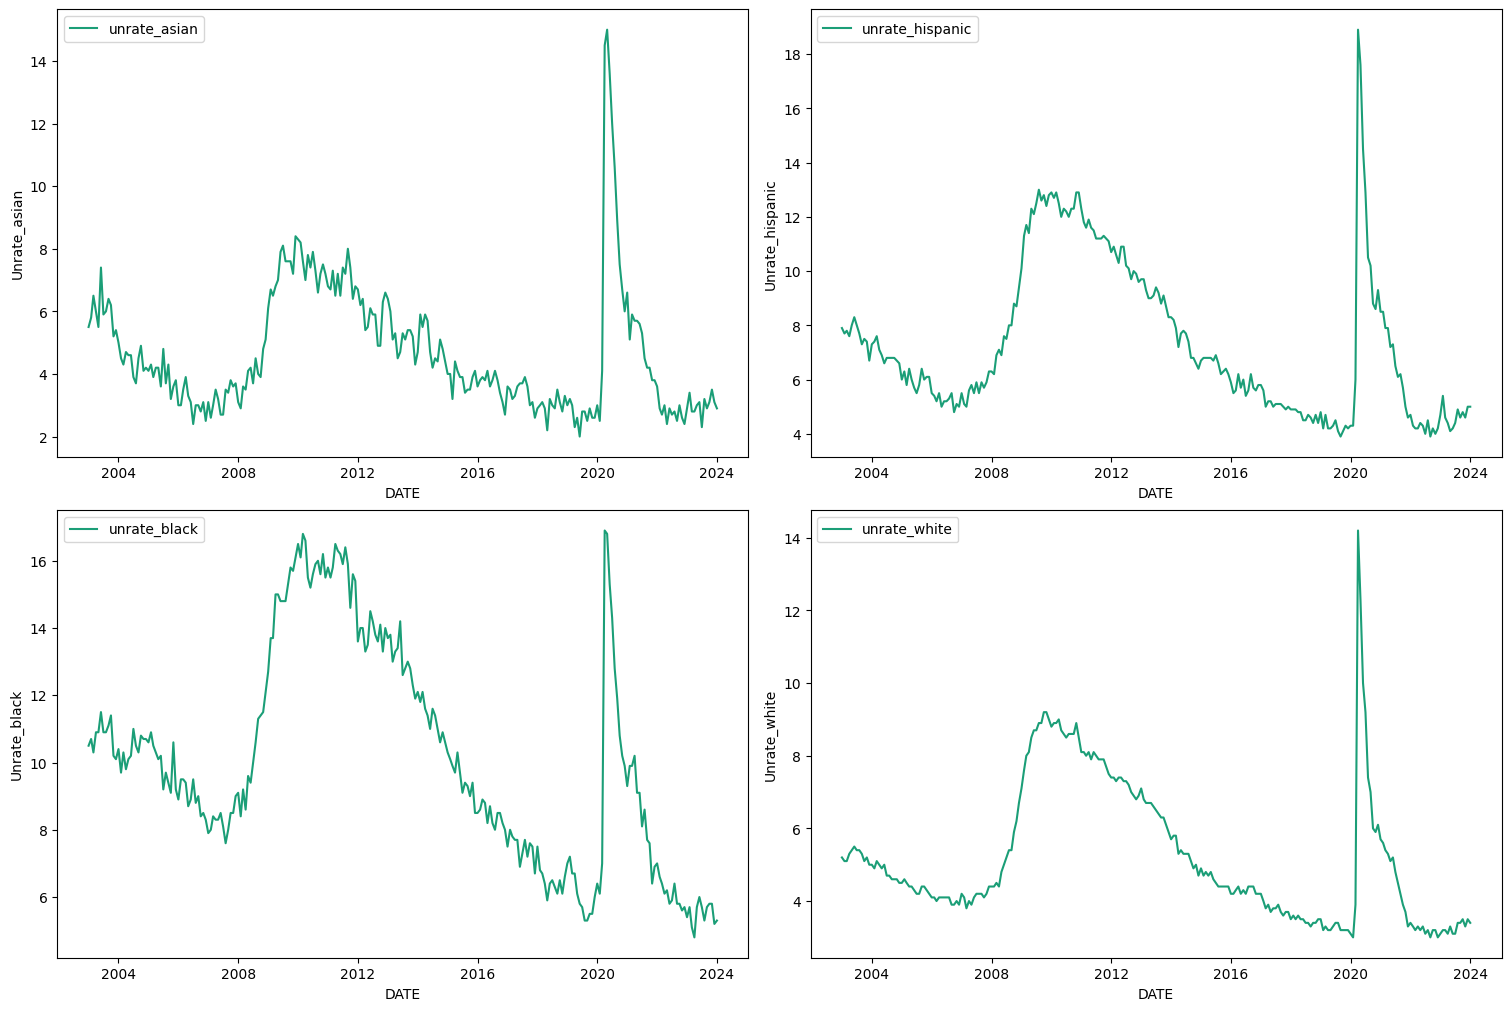

In [ ]:
def _plot_series(ax, series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['DATE']
    ys = series[series_name.lower()]  # Use the series_name parameter dynamically

    ax.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)

# Sort the DataFrame
df_sorted = merged_df.sort_values('DATE', ascending=True)

# Plot each series in a separate subplot
series_names = ['unrate_asian', 'unrate_hispanic', 'unrate_black', 'unrate_white']
for i, ax in enumerate(axes.flat):
    _plot_series(ax, df_sorted, series_names[i])
    ax.set_xlabel('DATE')
    ax.set_ylabel(series_names[i].capitalize())
    ax.legend()

plt.savefig('/content/drive/MyDrive/MA541_UnemploymentRate/fig1.png')
# Display the plots
plt.show()

In [ ]:
plt.savefig('fig2')

<Figure size 640x480 with 0 Axes>

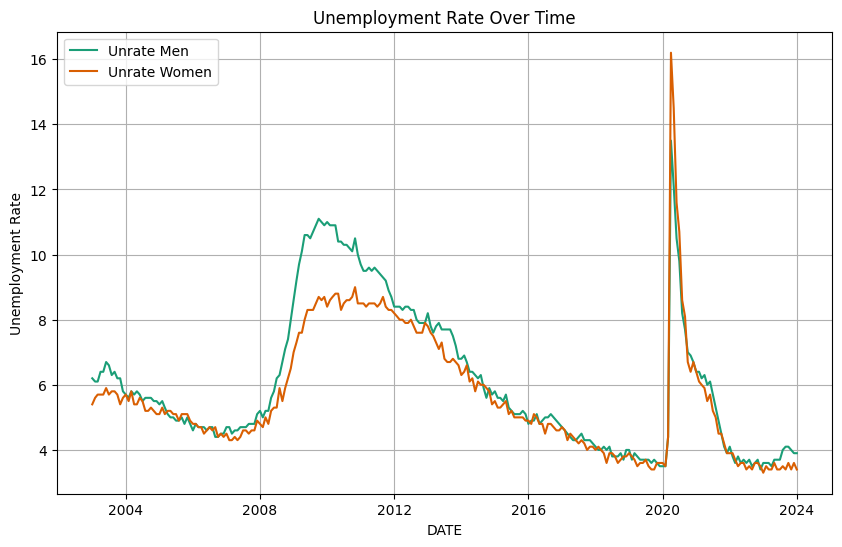

In [ ]:
def _plot_series(ax, series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['DATE']
    ys = series[series_name]  # Using the specified series_name column

    ax.plot(xs, ys, label=series_name.replace('_', ' ').title(), color=palette[series_index % len(palette)])

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Sort the DataFrame
merged_df_sorted = merged_df.sort_values('DATE', ascending=True)

# Plot the unemployment rate series for men
_plot_series(ax, merged_df_sorted, 'unrate_men', series_index=0)

# Plot the unemployment rate series for women
_plot_series(ax, merged_df_sorted, 'unrate_women', series_index=1)

# Set labels and title
ax.set_xlabel('DATE')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Unemployment Rate Over Time')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.savefig('fig3')

<Figure size 640x480 with 0 Axes>

The question that arises in the above plot is, why is the graph grouply similar for asian and black, and similar for white and hispanic?

The answer for the above question will be the part of inferential statistics

# Inferential Statistics

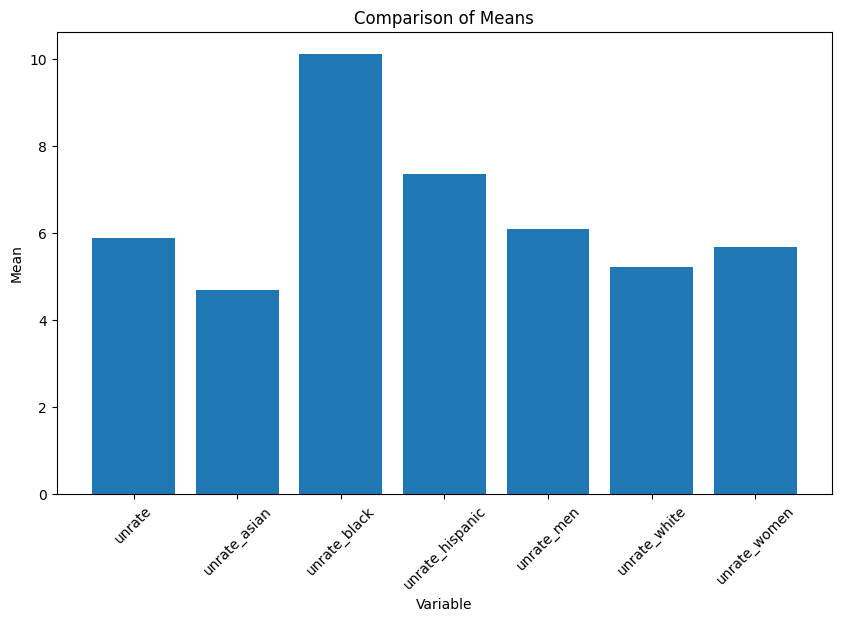

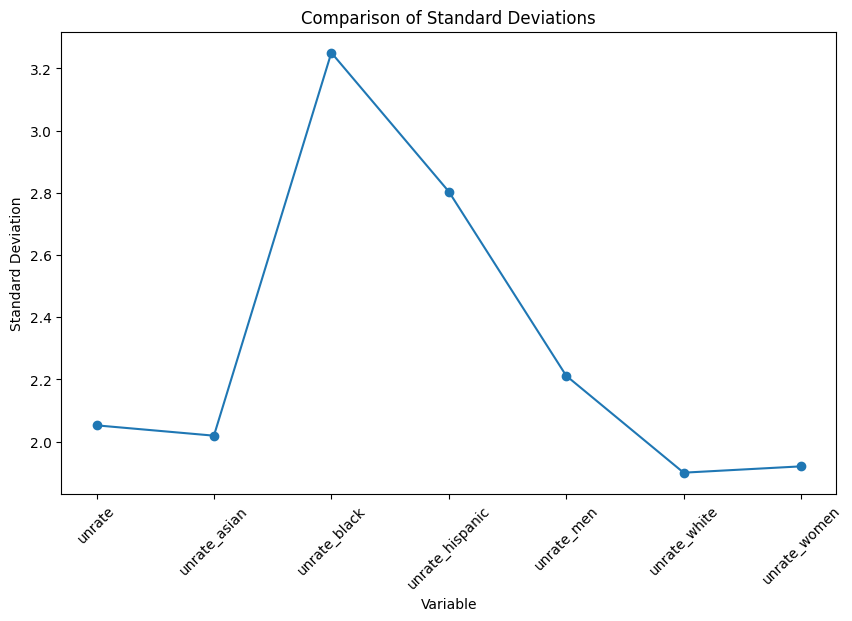

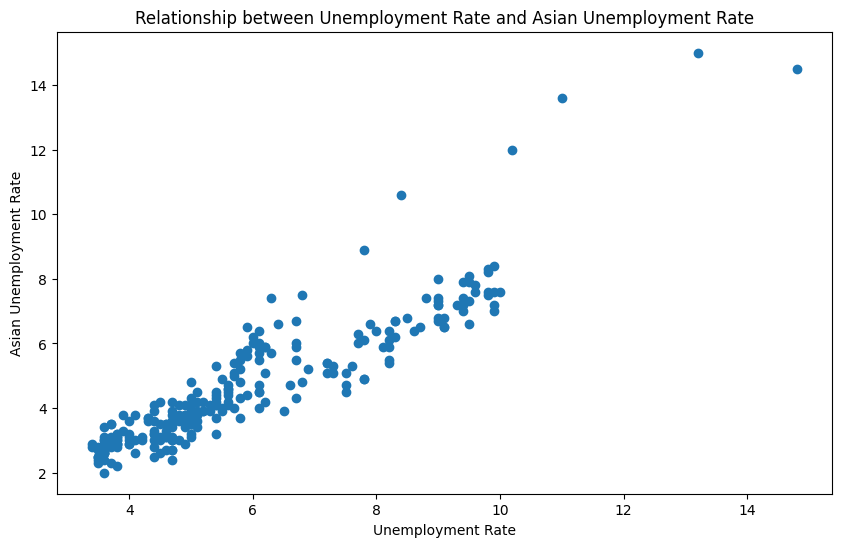

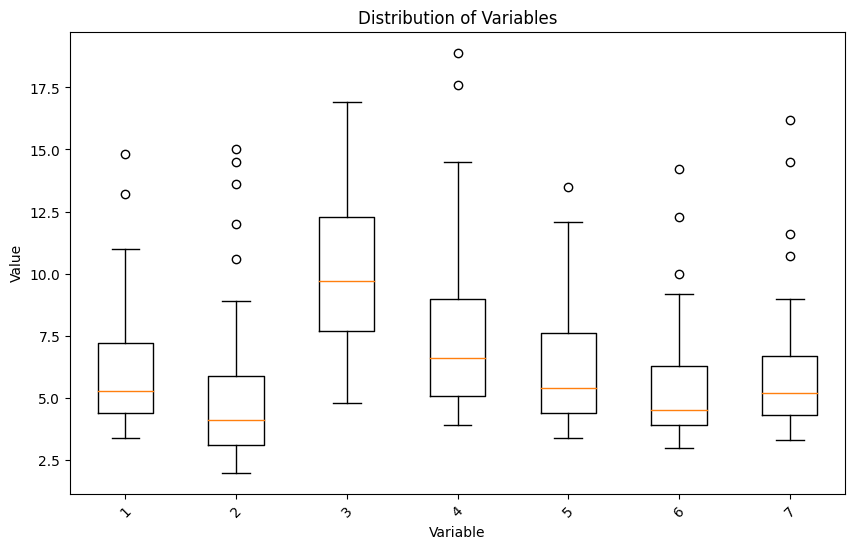

In [ ]:
df_inf = merged_df[['unrate', 'unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_men', 'unrate_white', 'unrate_women']]

# Calculate the mean and standard deviation for each variable
mean_values = df_inf.mean()
std_values = df_inf.std()

# Create a bar chart to compare the means
plt.figure(figsize=(10, 6))
plt.bar(mean_values.index, mean_values.values)
plt.xlabel('Variable')
plt.ylabel('Mean')
plt.title('Comparison of Means')
plt.xticks(rotation=45)
plt.show()

# Create a line chart to compare the standard deviations
plt.figure(figsize=(10, 6))
plt.plot(std_values.index, std_values.values, marker='o')
plt.xlabel('Variable')
plt.ylabel('Standard Deviation')
plt.title('Comparison of Standard Deviations')
plt.xticks(rotation=45)
plt.show()

# Create a scatter plot to show the relationship between two variables
plt.figure(figsize=(10, 6))
plt.scatter(df_inf['unrate'], df_inf['unrate_asian'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Asian Unemployment Rate')
plt.title('Relationship between Unemployment Rate and Asian Unemployment Rate')
plt.show()

# Create a box plot to show the distribution of each variable
plt.figure(figsize=(10, 6))
plt.boxplot(df_inf.values)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Variables')
plt.xticks(rotation=45)
plt.show()


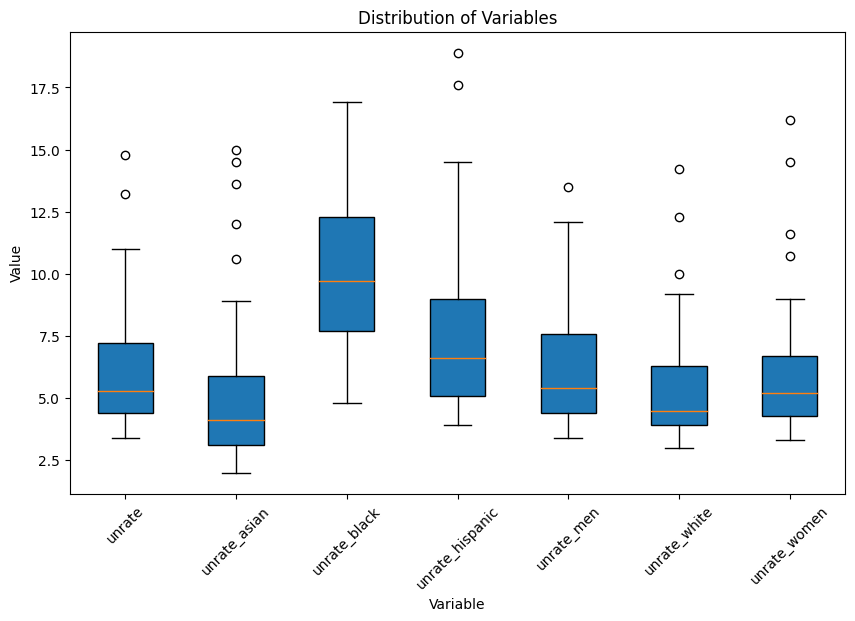

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(df_inf.values, patch_artist=True)  # 'patch_artist=True' to fill with color
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Distribution of Variables')

# Set the xticks to be the names of the df_inf columns
plt.xticks(ticks=range(1, len(df_inf.columns) + 1), labels=df_inf.columns, rotation=45)

plt.show()

The above four graphs present an analysis of unemployment rates across different racial groups in the US. A general trend emerges, mirroring that of the overall unemployment rate.

Blacks consistently exhibit the highest unemployment rates, with an average mean of 10.10. Following closely behind are Hispanics, with an average mean of 7.35.

The recent increase in unemployment rates among Asians, from an average mean of 4.6 to 5.9 by the fourth quarter of the analysis, may be attributed to heightened discrimination and xenophobia following the COVID-19 pandemic.

These trends underscore disparities in employment opportunities among different racial groups, highlighting areas for targeted intervention and support to address systemic inequalities.

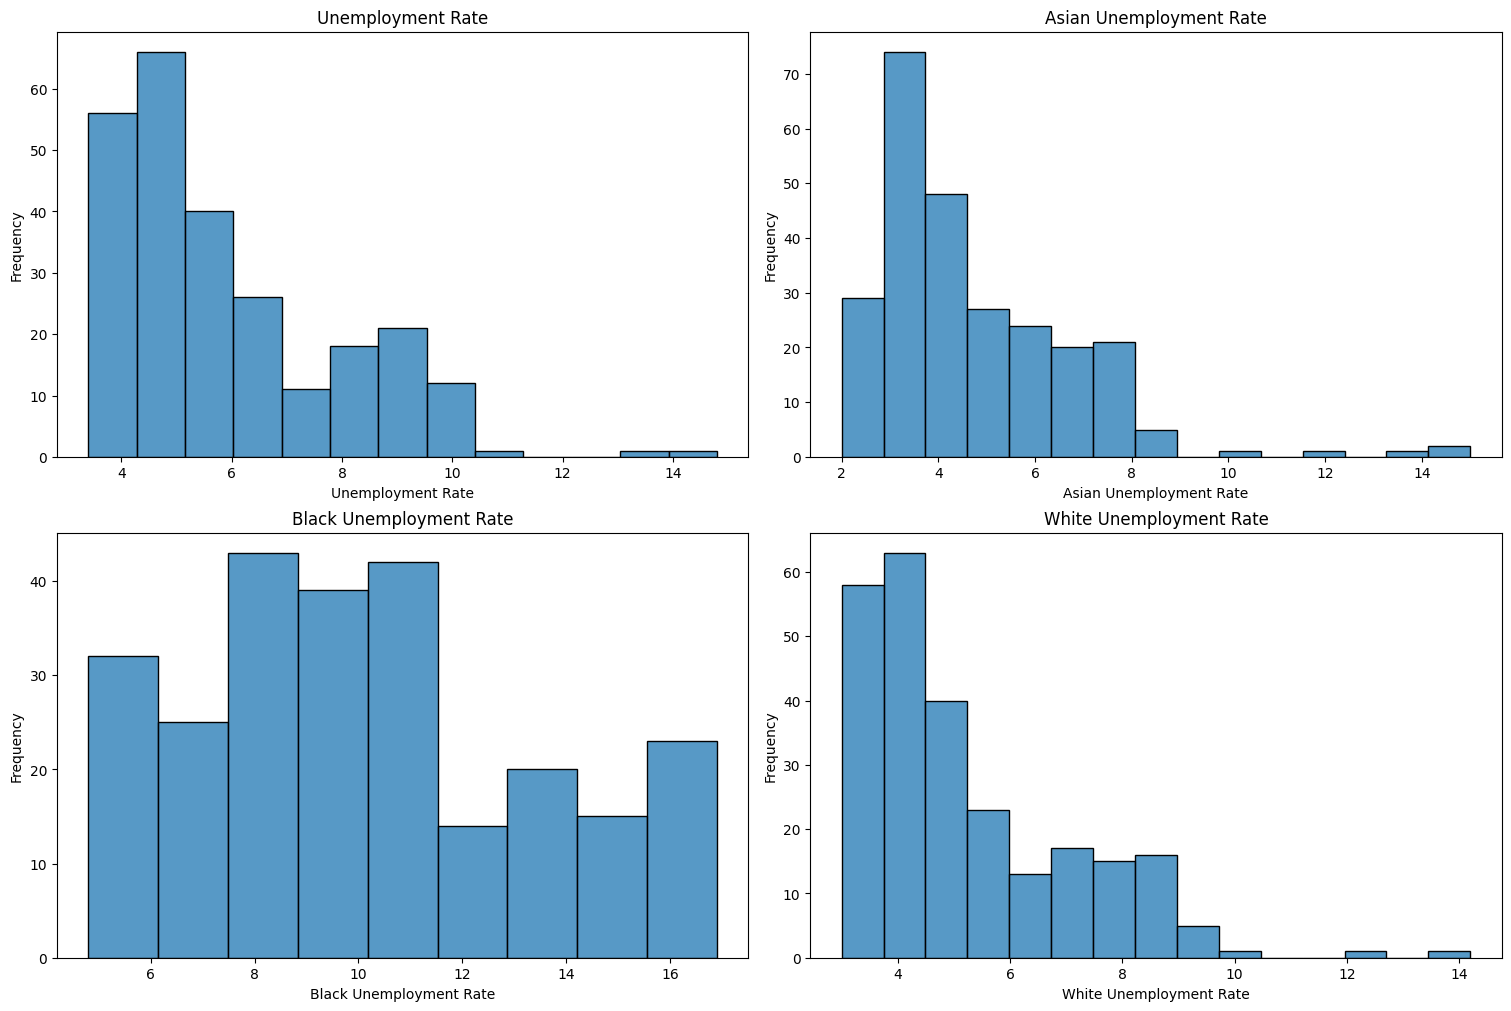

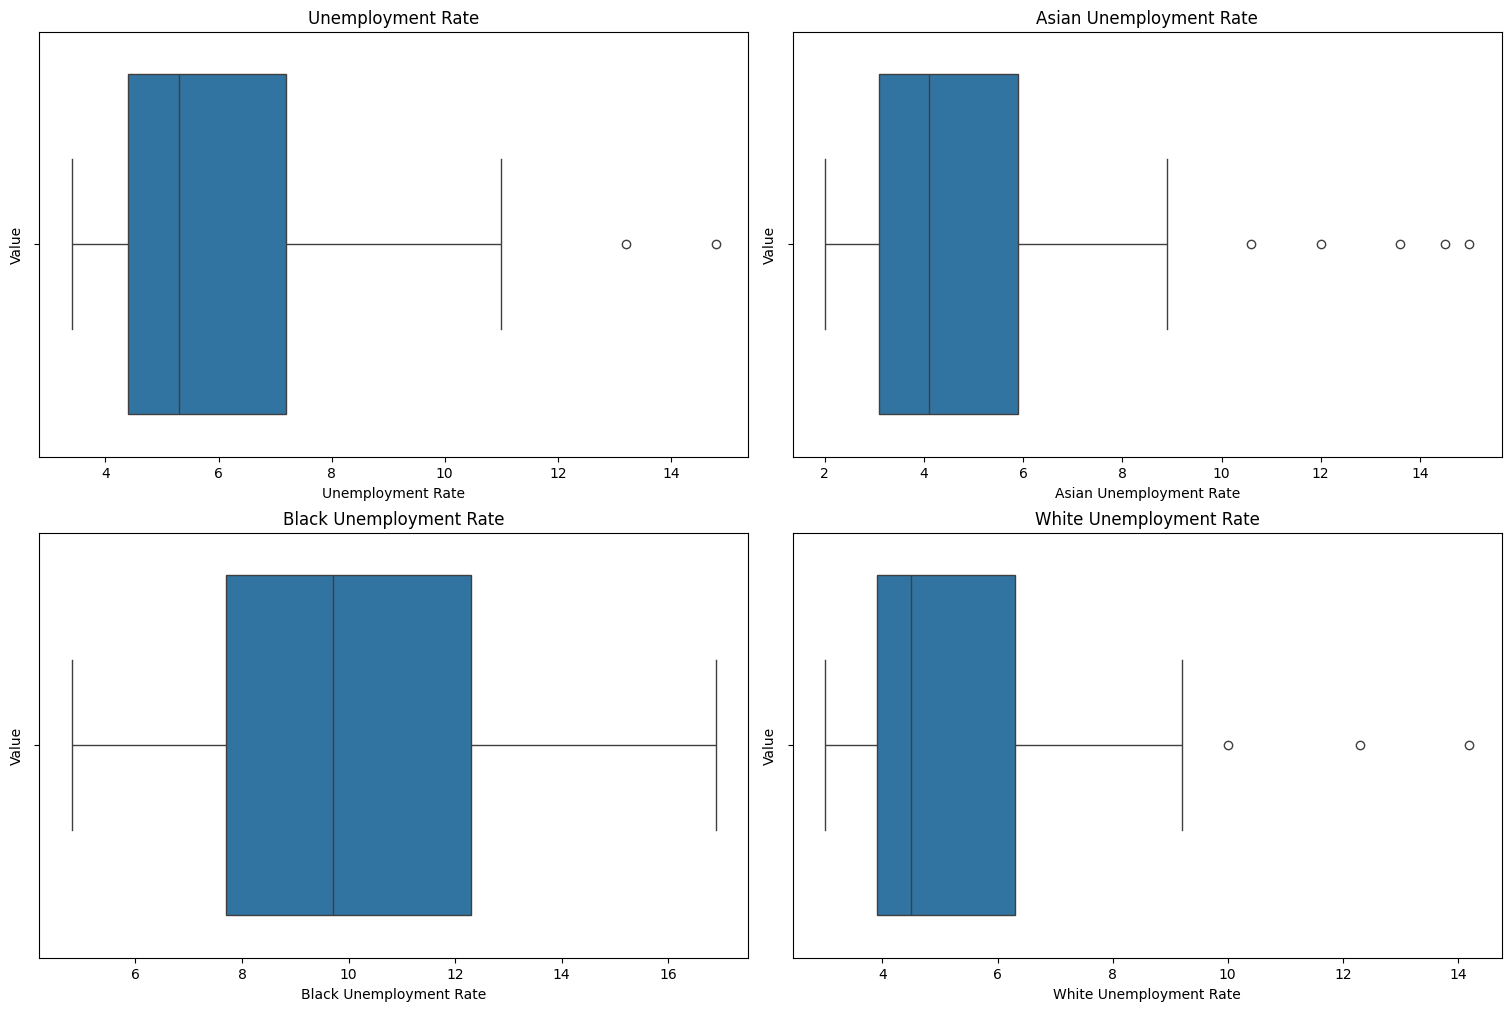

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)

# Plot the histograms
sns.histplot(data=merged_df, x="unrate", ax=axes[0, 0])
sns.histplot(data=merged_df, x="unrate_asian", ax=axes[0, 1])
sns.histplot(data=merged_df, x="unrate_black", ax=axes[1, 0])
sns.histplot(data=merged_df, x="unrate_white", ax=axes[1, 1])

# Set the titles and labels
axes[0, 0].set_title("Unemployment Rate")
axes[0, 1].set_title("Asian Unemployment Rate")
axes[1, 0].set_title("Black Unemployment Rate")
axes[1, 1].set_title("White Unemployment Rate")
axes[0, 0].set_xlabel("Unemployment Rate")
axes[0, 1].set_xlabel("Asian Unemployment Rate")
axes[1, 0].set_xlabel("Black Unemployment Rate")
axes[1, 1].set_xlabel("White Unemployment Rate")
axes[0, 0].set_ylabel("Frequency")
axes[0, 1].set_ylabel("Frequency")
axes[1, 0].set_ylabel("Frequency")
axes[1, 1].set_ylabel("Frequency")

plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)

sns.boxplot(data=merged_df, x="unrate", ax=axes[0, 0])
sns.boxplot(data=merged_df, x="unrate_asian", ax=axes[0, 1])
sns.boxplot(data=merged_df, x="unrate_black", ax=axes[1, 0])
sns.boxplot(data=merged_df, x="unrate_white", ax=axes[1, 1])

axes[0, 0].set_title("Unemployment Rate")
axes[0, 1].set_title("Asian Unemployment Rate")
axes[1, 0].set_title("Black Unemployment Rate")
axes[1, 1].set_title("White Unemployment Rate")
axes[0, 0].set_xlabel("Unemployment Rate")
axes[0, 1].set_xlabel("Asian Unemployment Rate")
axes[1, 0].set_xlabel("Black Unemployment Rate")
axes[1, 1].set_xlabel("White Unemployment Rate")
axes[0, 0].set_ylabel("Value")
axes[0, 1].set_ylabel("Value")
axes[1, 0].set_ylabel("Value")
axes[1, 1].set_ylabel("Value")

plt.show()

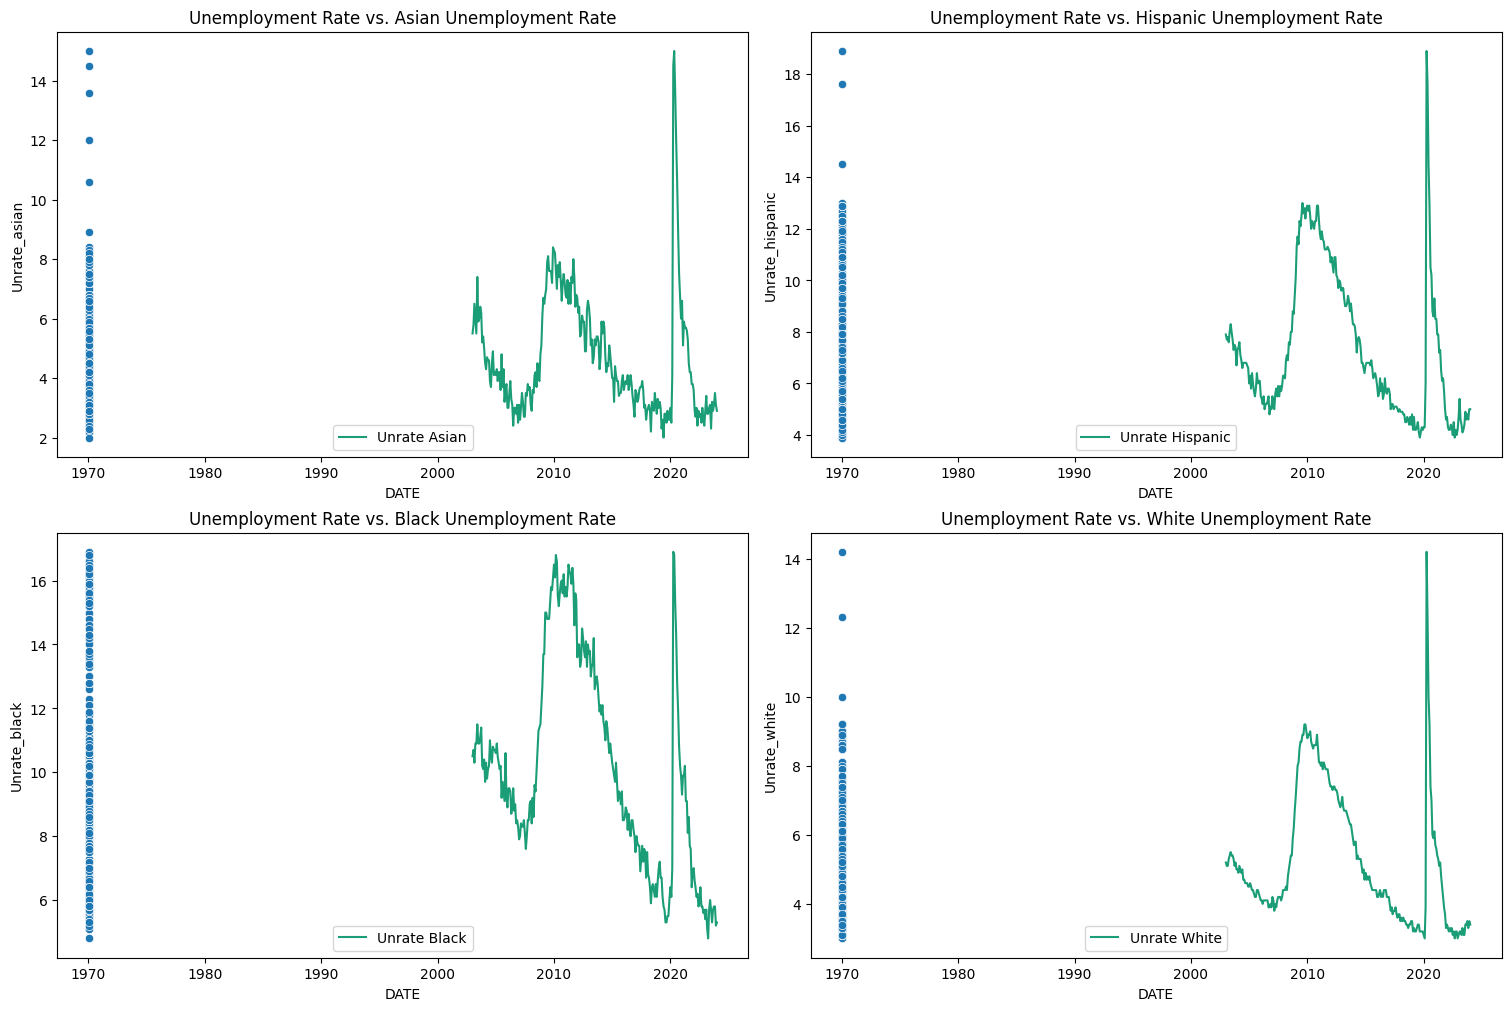

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)

# Sort the DataFrame
df_sorted = merged_df.sort_values('DATE', ascending=True)

# Plot each series in a separate subplot
series_names = ['unrate_asian', 'unrate_hispanic', 'unrate_black', 'unrate_white']
for i, ax in enumerate(axes.flat):
    _plot_series(ax, df_sorted, series_names[i])
    ax.set_xlabel('DATE')
    ax.set_ylabel(series_names[i].capitalize())
    ax.legend()

# Plot a scatter plot of unrate vs. unrate_asian
sns.scatterplot(data=merged_df, x='unrate', y='unrate_asian', ax=axes[0, 0])
axes[0, 0].set_title('Unemployment Rate vs. Asian Unemployment Rate')

# Plot a scatter plot of unrate vs. unrate_hispanic
sns.scatterplot(data=merged_df, x='unrate', y='unrate_hispanic', ax=axes[0, 1])
axes[0, 1].set_title('Unemployment Rate vs. Hispanic Unemployment Rate')

# Plot a scatter plot of unrate vs. unrate_black
sns.scatterplot(data=merged_df, x='unrate', y='unrate_black', ax=axes[1, 0])
axes[1, 0].set_title('Unemployment Rate vs. Black Unemployment Rate')

# Plot a scatter plot of unrate vs. unrate_white
sns.scatterplot(data=merged_df, x='unrate', y='unrate_white', ax=axes[1, 1])
axes[1, 1].set_title('Unemployment Rate vs. White Unemployment Rate')

# Display the plots
plt.show()

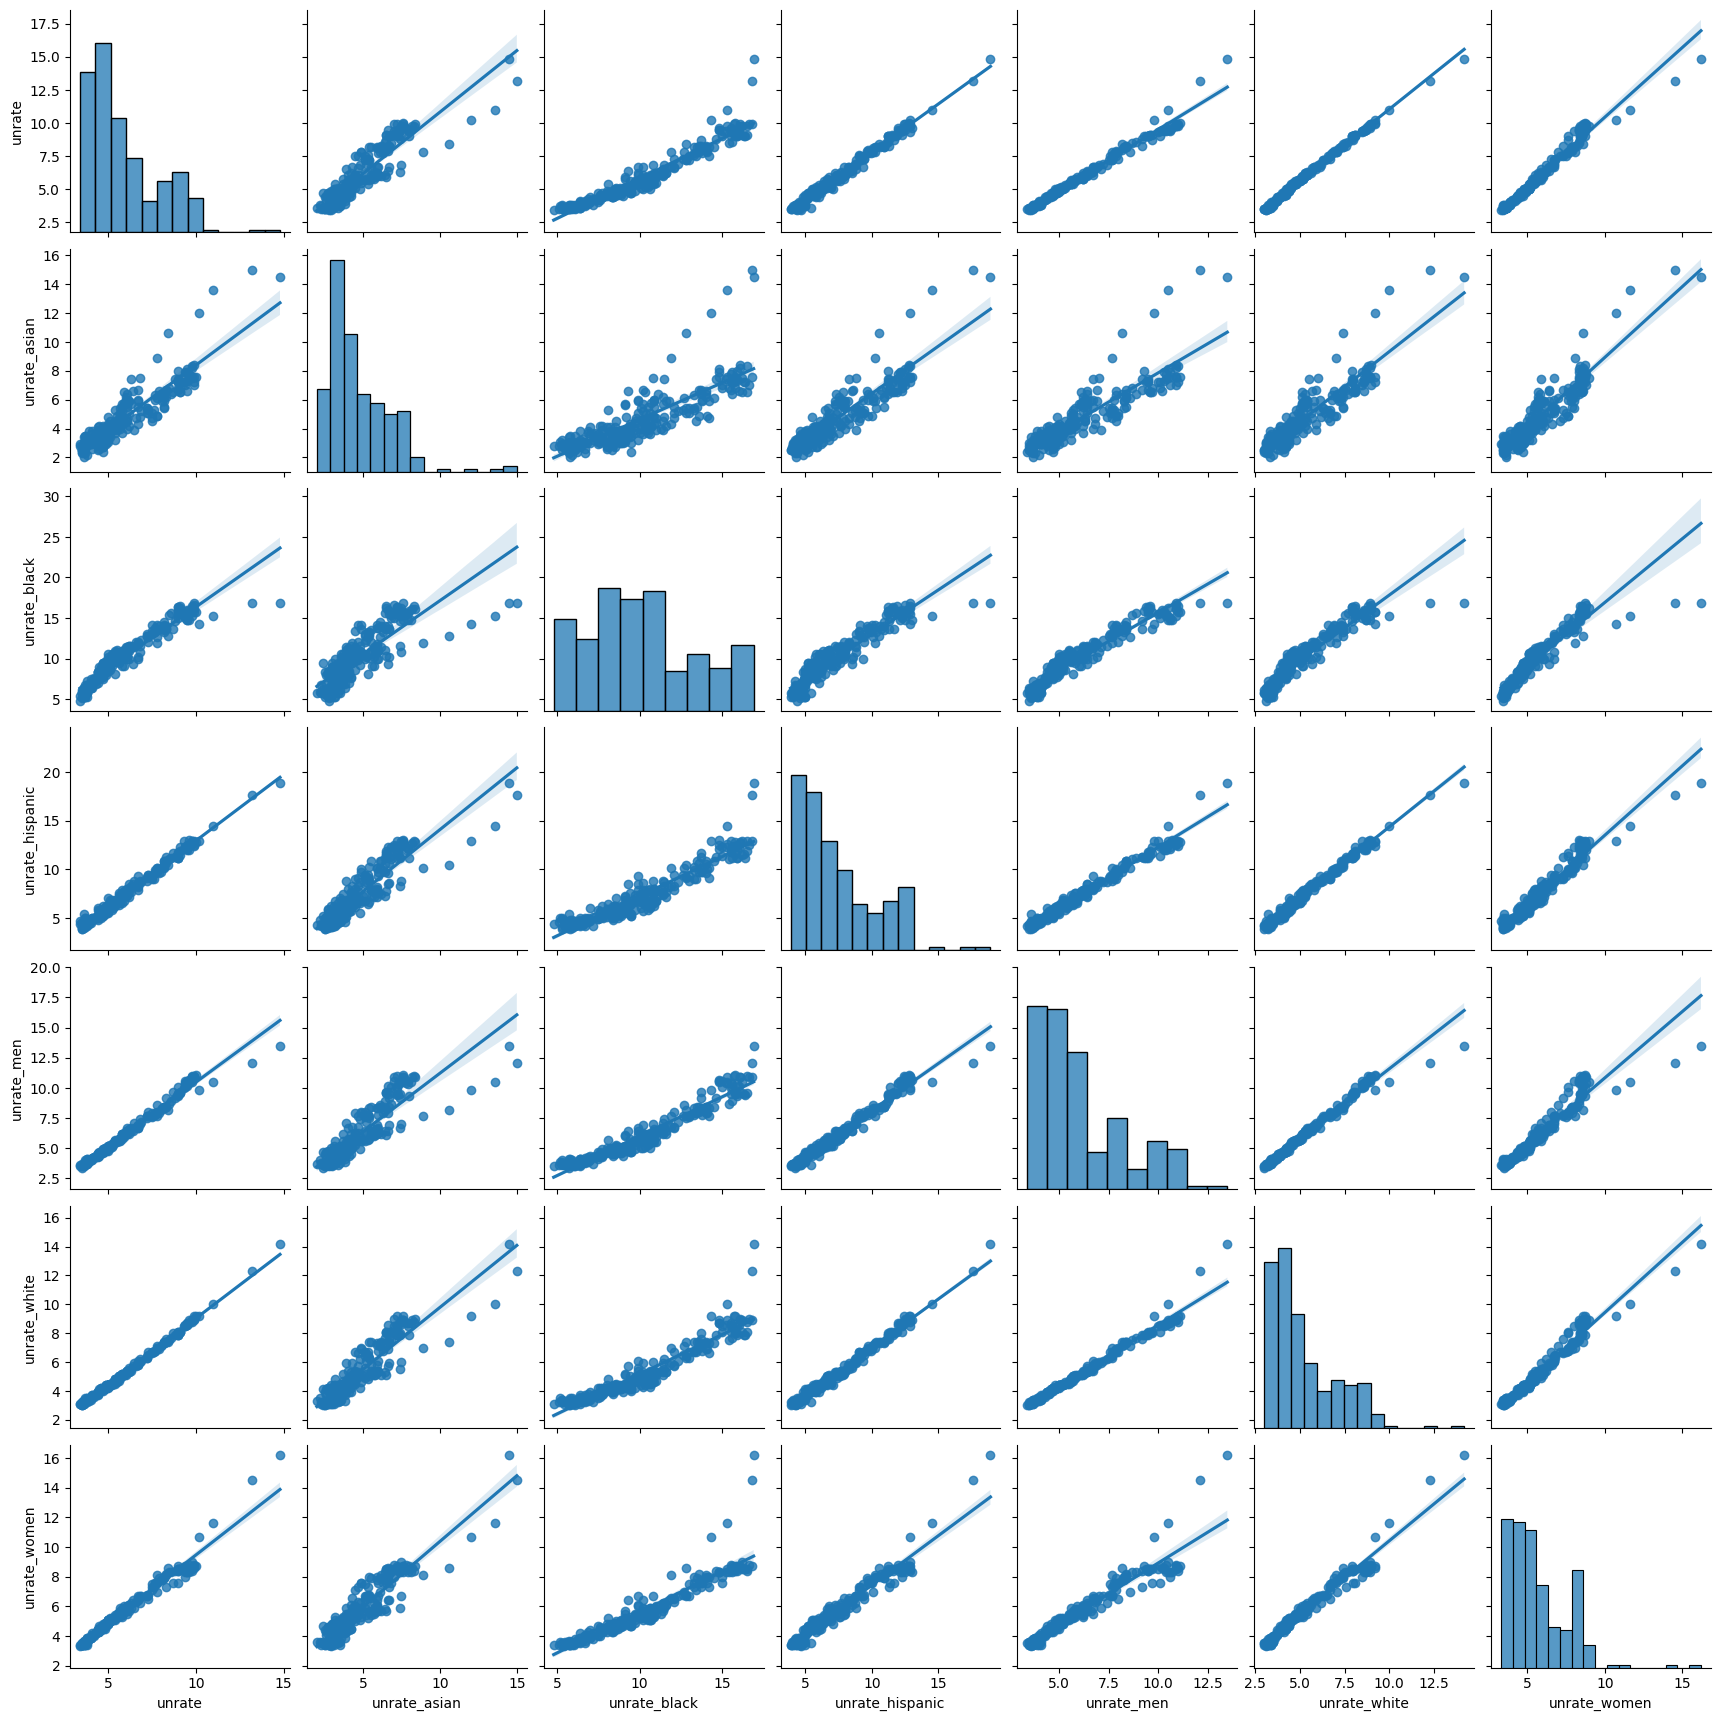

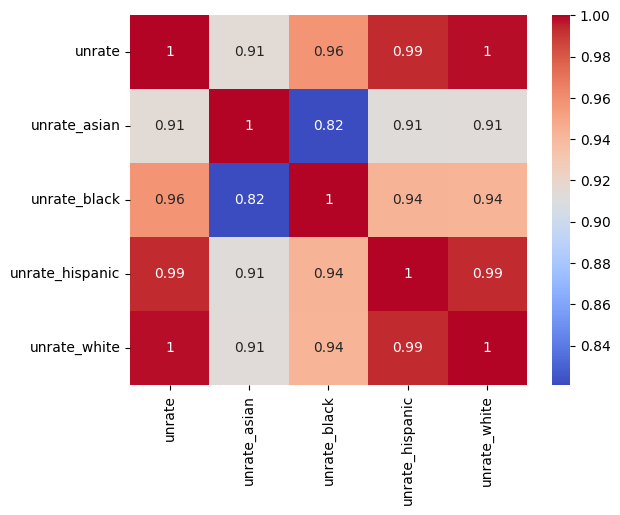

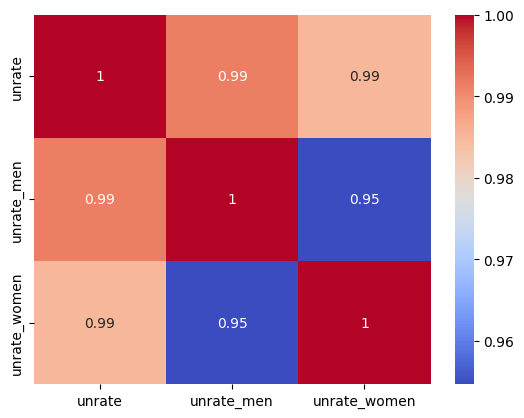

                            OLS Regression Results                            
Dep. Variable:                 unrate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.498e+05
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        03:28:32   Log-Likelihood:                 497.35
No. Observations:                 253   AIC:                            -980.7
Df Residuals:                     246   BIC:                            -956.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0131      0.009     

In [ ]:
# Create a scatter plot matrix
sns.pairplot(merged_df[['unrate', 'unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_men', 'unrate_white', 'unrate_women']], kind='reg')
plt.show()

# Create a heatmap of the correlation matrix
corr_matrix = merged_df[['unrate', 'unrate_asian', 'unrate_black', 'unrate_hispanic',  'unrate_white']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

corr_matrix = merged_df[['unrate', 'unrate_men', 'unrate_women']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Perform a linear regression analysis
import statsmodels.formula.api as smf

# Fit a linear regression model to the data
model = smf.ols('unrate ~ unrate_asian + unrate_black + unrate_hispanic + unrate_men + unrate_white + unrate_women', data=merged_df)
results = model.fit()

# Print the regression results
print(results.summary())

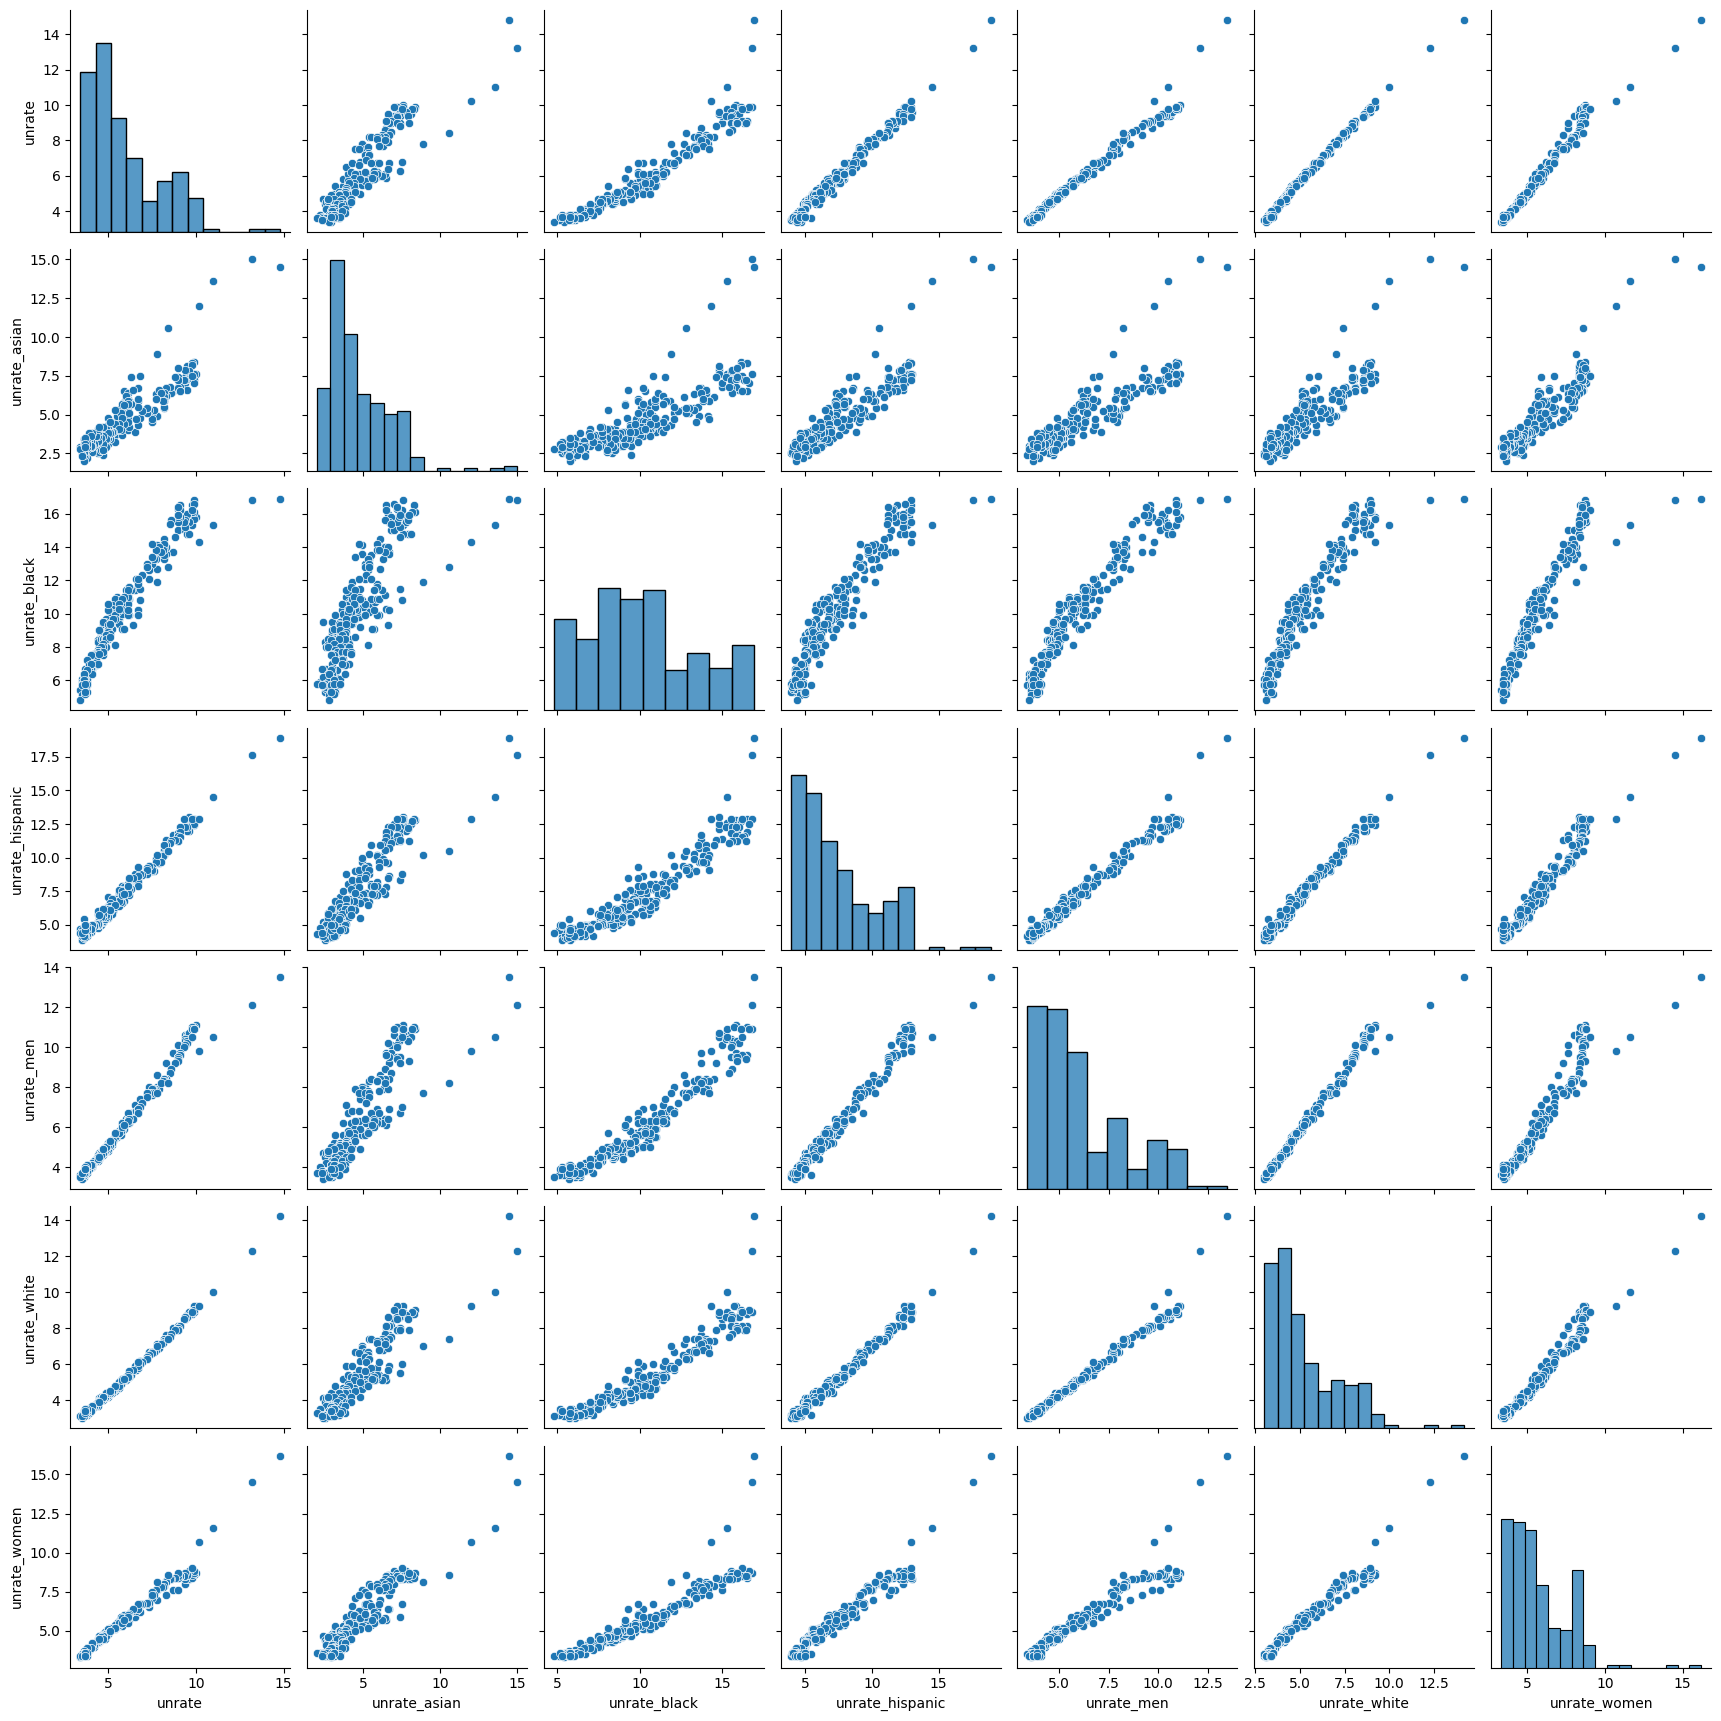

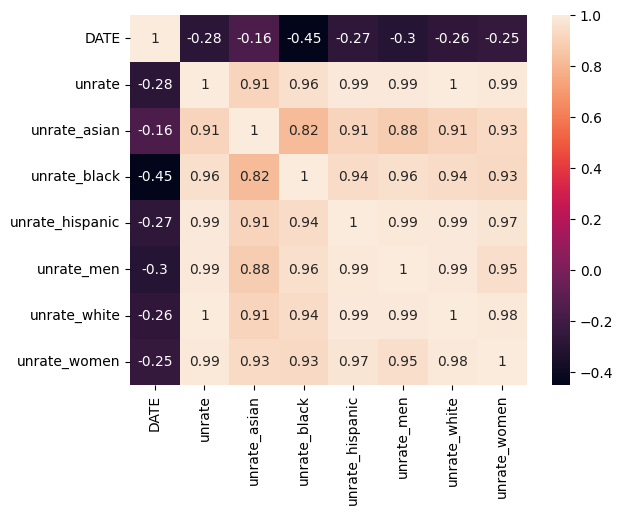

Regression coefficients: [0.00727992 0.02233529 0.00778606 0.42416535 0.15347007 0.38373573]


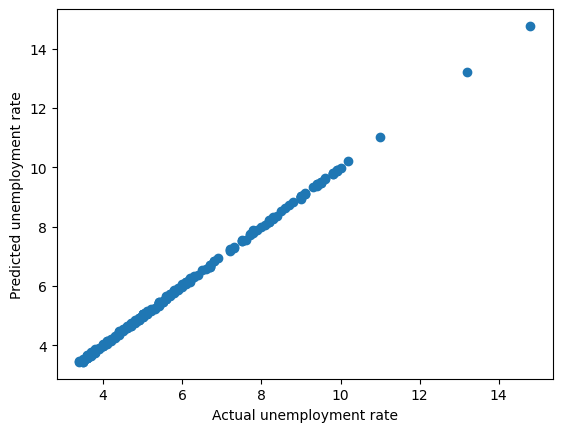

In [ ]:
# Create a pairplot to visualize the relationships between the variables
sns.pairplot(merged_df, vars=['unrate', 'unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_men', 'unrate_white', 'unrate_women'])
plt.show()

# Create a heatmap to visualize the correlation coefficients
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Perform a linear regression to model the relationship between unemployment rate and race
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = merged_df[['unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_men', 'unrate_white', 'unrate_women']]
y = merged_df['unrate']
model.fit(X, y)

# Print the regression coefficients
print('Regression coefficients:', model.coef_)

# Make predictions
predictions = model.predict(X)

# Plot the actual values and the predictions
plt.scatter(y, predictions)
plt.xlabel('Actual unemployment rate')
plt.ylabel('Predicted unemployment rate')
plt.show()


# Time Series Analysis

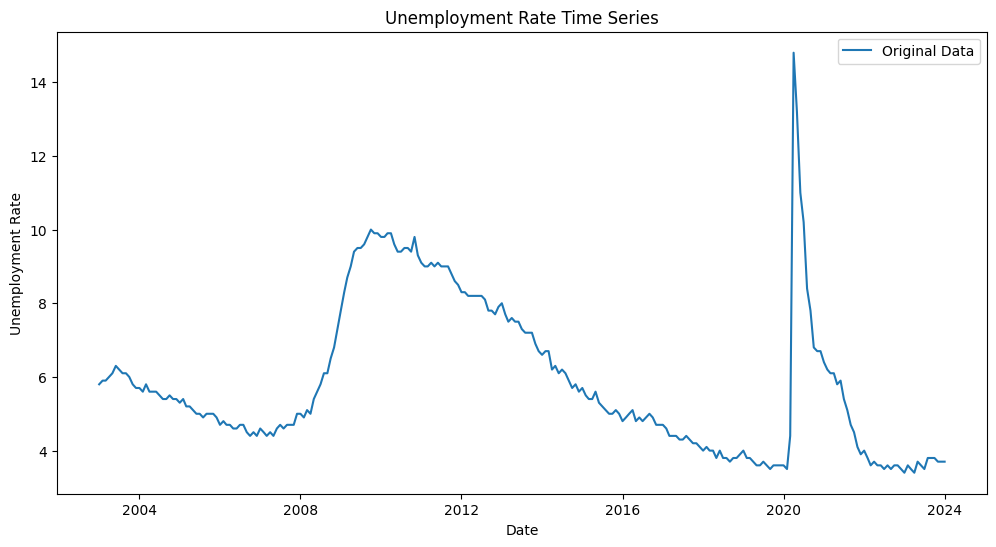

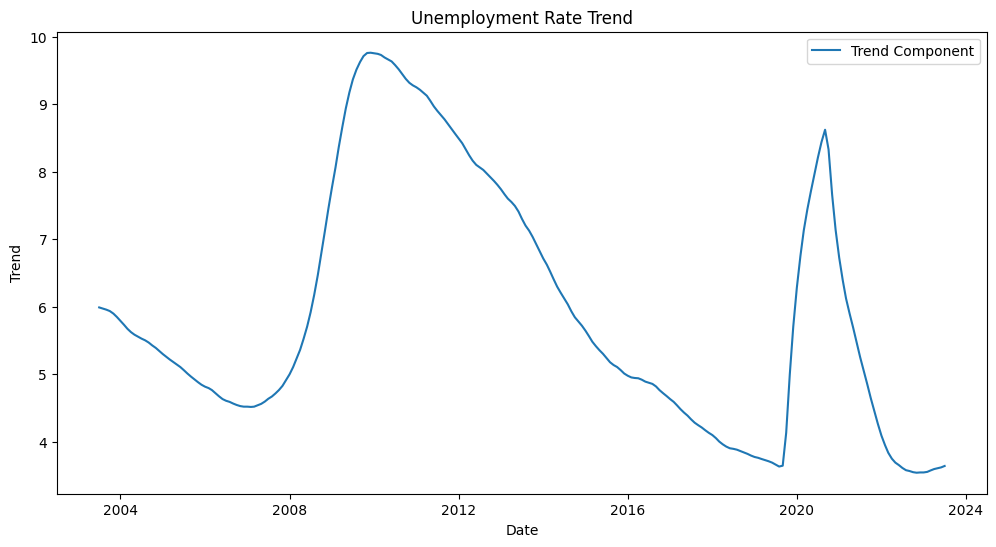

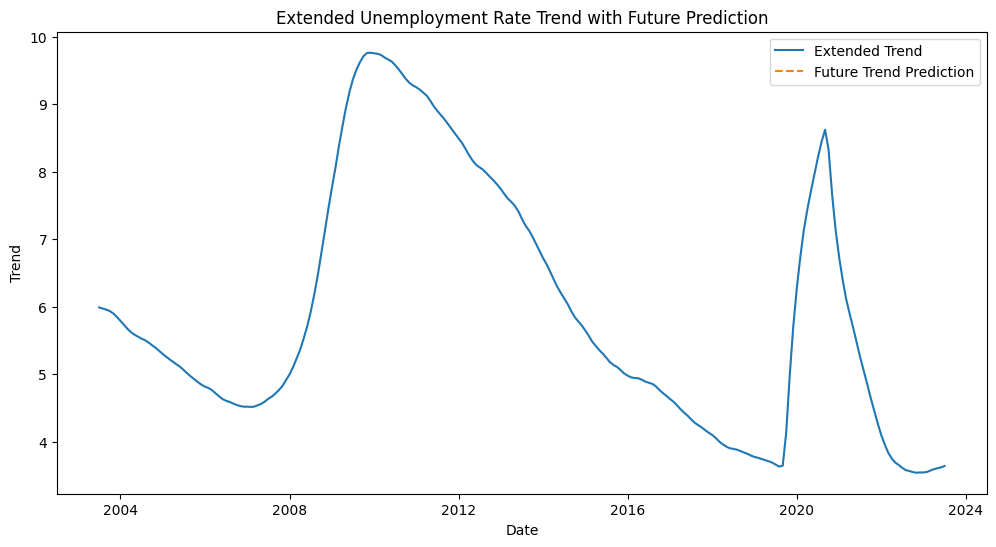

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'merged_df' is loaded with the provided column names and data

# Ensure 'DATE' column is parsed as datetime and set as the index
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'], format='%Y-%m-%d')
merged_df.set_index('DATE', inplace=True)

# Sort the DataFrame by date (if not already sorted)
merged_df.sort_index(inplace=True)

# Extract the 'unrate' column for analysis
unemployment_rate = merged_df['unrate']

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(unemployment_rate.index, unemployment_rate, label='Original Data')
plt.title('Unemployment Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

# Perform time series decomposition for trend analysis
decomposition = sm.tsa.seasonal_decompose(unemployment_rate, model='additive')
trend = decomposition.trend

# Plot the trend component
plt.figure(figsize=(12, 6))
plt.plot(trend.index, trend, label='Trend Component')
plt.title('Unemployment Rate Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()

# Extend the trend series to forecast future values
forecast_horizon = 12  # Forecasting 12 months ahead
future_dates = pd.date_range(start=trend.index[-1], periods=forecast_horizon + 1, freq='M')[1:]  # Generate future dates

# Concatenate the trend with future dates for forecasting
extended_trend = pd.concat([trend, pd.Series(index=future_dates)], axis=0)

# Optionally, use a forecasting model to predict future values based on the trend
# Example: Simple linear regression for illustration
X = sm.add_constant(range(len(trend)))
model = sm.OLS(trend, X)
results = model.fit()

# Generate predictions for future time points
future_indices = range(len(trend), len(trend) + forecast_horizon)
future_trend_predictions = results.predict(sm.add_constant(future_indices))

# Plot the extended trend with future trend predictions
plt.figure(figsize=(12, 6))
plt.plot(extended_trend.index, extended_trend, label='Extended Trend')
plt.plot(future_dates, future_trend_predictions, label='Future Trend Prediction', linestyle='--')
plt.title('Extended Unemployment Rate Trend with Future Prediction')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()


Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

data = pd.read_csv('data.csv')

X = data[['unrate_men', 'unrate_women','unrate_white', 'unrate_black', 'unrate_asian', 'unrate_hispanic']]
y = data['unrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Intercept:", model.intercept_)
print("Training set: MSE =", train_mse, "R2 =", train_r2)
print("Test set: MSE =", test_mse, "R2 =", test_r2)

Intercept: 0.014888097503958697
Training set: MSE = 0.0011857274340311018 R2 = 0.9997165096822319
Test set: MSE = 0.0010443558545017155 R2 = 0.9997462939696454


In [ ]:
import statsmodels.api as sm

# Add a constant to the features matrix
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Summary of the model
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                 unrate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.146e+05
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        03:29:54   Log-Likelihood:                 393.85
No. Observations:                 202   AIC:                            -773.7
Df Residuals:                     195   BIC:                            -750.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0149      0.010     

In [ ]:
from tabulate import tabulate
import pandas as pd
import statsmodels.api as sm

# Fit the model with statsmodels to access additional statistics
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Calculate correlation between features and target variable
correlation = X_train.corrwith(y_train)

# Extract coefficients, standard errors, and p-values
coefficients = model_sm.params
std_errors = model_sm.bse
p_values = model_sm.pvalues

# Create a DataFrame for the summary table
summary_table = pd.DataFrame({
    'Feature': list(X_train.columns),
    'Correlation(R)': correlation.values,
    'Coefficient': coefficients[1:],  # Exclude the intercept coefficient
    'Standard Error': std_errors[1:],  # Exclude the intercept standard error
    'P-value': p_values[1:]  # Exclude the intercept p-value
})

# Convert DataFrame to tabular form
table = tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)

+-----------------+--------------------+-----------------------+----------------------+------------------------+
|     Feature     |   Correlation(R)   |      Coefficient      |    Standard Error    |        P-value         |
+-----------------+--------------------+-----------------------+----------------------+------------------------+
|   unrate_men    | 0.9920219679582721 |  0.4255505400583283   | 0.027585753495497734 | 1.2815204773492242e-35 |
|  unrate_women   | 0.9859093654507795 |  0.3905544890075142   | 0.022230706678514914 | 4.816157170572885e-42  |
|  unrate_white   | 0.9980563580840371 |  0.1457904664724542   | 0.041857003935127736 | 0.0006119411364380394  |
|  unrate_black   | 0.9591261378902814 | 0.019453911452252448  | 0.005954164346301595 | 0.0012831179921868612  |
|  unrate_asian   | 0.9139519819008098 | 0.0038480462739604662 | 0.004448377263860513 |  0.38807705935207115   |
| unrate_hispanic | 0.9930349642515867 | 0.012692943058088518  | 0.008097359829919056 |  0.11860

Multiple Linear Regression

In [ ]:
data = pd.read_csv('data.csv')

X = data[['unrate_white', 'unrate_black', 'unrate_asian', 'unrate_hispanic']]
y = data['unrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [0.82470781 0.10849343 0.05847662 0.01470227]
Mean squared error: 0.00
Coefficient of determination: 1.00


### Multiple Regression based on races

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv('data.csv')

# Define features and target
X = data[['unrate_white', 'unrate_black', 'unrate_asian', 'unrate_hispanic']]
y = data['unrate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions
y_pred = regr.predict(X_test)

# Fit the model with statsmodels to access additional statistics
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Extract coefficients, standard errors, and p-values
coefficients = model_sm.params
std_errors = model_sm.bse
p_values = model_sm.pvalues

# Create a DataFrame for the summary table
summary_table = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_train.columns),
    'Coefficient': coefficients,
    'Standard Error': std_errors,
    'P-value': p_values
})

# Convert DataFrame to tabular form
table = tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)

+-----------------+---------------------+----------------------+-------------------------+
|     Feature     |     Coefficient     |    Standard Error    |         P-value         |
+-----------------+---------------------+----------------------+-------------------------+
|    Intercept    | 0.09855387997910126 | 0.014218673028058442 |  5.80765945439012e-11   |
|  unrate_white   | 0.8247078114535469  | 0.01813416554345014  | 1.9929920022089285e-106 |
|  unrate_black   | 0.10849343381570326 | 0.003961063096532214 | 4.2573501653816024e-69  |
|  unrate_asian   | 0.05847661540671351 | 0.005100294550933888 | 1.2077265805297107e-23  |
| unrate_hispanic | 0.01470227393011489 | 0.012536362804066396 |   0.24230407421008837   |
+-----------------+---------------------+----------------------+-------------------------+


In [ ]:
# Extracting the intercept and coefficients
intercept = regr.intercept_
coefficients = regr.coef_

# Display the equation
equation = f'y = {intercept:.2f}'
for i, coef in enumerate(coefficients):
    equation += f' + ({coef:.2f} * {X.columns[i]})'

print("Multiple Linear Regression Prediction Equation:")
print(equation)


Multiple Linear Regression Prediction Equation:
y = 0.10 + (0.82 * unrate_white) + (0.11 * unrate_black) + (0.06 * unrate_asian) + (0.01 * unrate_hispanic)


### Multiple Regression based on gender

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv('data.csv')

# Define features and target
X = data[['unrate_women', 'unrate_men']]
y = data['unrate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the multiple regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions
y_pred = regr.predict(X_test)

# Fit the model with statsmodels to access additional statistics
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Extract coefficients, standard errors, and p-values
coefficients = model_sm.params
std_errors = model_sm.bse
p_values = model_sm.pvalues

# Create a DataFrame for the summary table
summary_table = pd.DataFrame({
    'Feature': ['Intercept'] + list(X_train.columns),
    'Coefficient': coefficients,
    'Standard Error': std_errors,
    'P-value': p_values
})

# Convert DataFrame to tabular form
table = tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)

+--------------+-----------------------+-----------------------+-------------------------+
|   Feature    |      Coefficient      |    Standard Error     |         P-value         |
+--------------+-----------------------+-----------------------+-------------------------+
|  Intercept   | 0.0011825896001811664 | 0.008234587426804902  |   0.8859517986437063    |
| unrate_women |  0.46744801260444185  | 0.0046725327800021775 | 4.029879976438028e-172  |
|  unrate_men  |   0.532074954826441   | 0.0039910236012243765 | 1.4331638251713315e-196 |
+--------------+-----------------------+-----------------------+-------------------------+


In [ ]:
# Extracting the intercept and coefficients
intercept = regr.intercept_
coefficients = regr.coef_

# Display the equation
equation = f'y = {intercept:.2f}'
for i, coef in enumerate(coefficients):
    equation += f' + ({coef:.2f} * {X.columns[i]})'

print("Multiple Linear Regression Prediction Equation:")
print(equation)

Multiple Linear Regression Prediction Equation:
y = 0.00 + (0.47 * unrate_women) + (0.53 * unrate_men)


SVR

In [ ]:
from sklearn.svm import SVR

data = pd.read_csv('data.csv')

X = data[['unrate_men', 'unrate_asian', 'unrate_black', 'unrate_hispanic']]
y = data['unrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVR(kernel='linear')

svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training set: MSE =", train_mse, "R2 =", train_r2)
print("Test set: MSE =", test_mse, "R2 =", test_r2)

Training set: MSE = 0.03122483193718946 R2 = 0.9925345933019064
Test set: MSE = 0.03231821747865207 R2 = 0.9921489149227242


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv('data.csv')

# Define features and target
X = data[['unrate_white', 'unrate_asian', 'unrate_black', 'unrate_hispanic','unrate_women', 'unrate_men']]
y = data['unrate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit SVR model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)

# Coefficients (dual coefficients in SVR)
coefficients = svm_model.dual_coef_

# Intercept
intercept = svm_model.intercept_

# Create a DataFrame for the summary table
summary_table = pd.DataFrame({
    'Feature': list(X_train.columns),
    'Coefficient': coefficients[0],  # Coefficients (dual coefficients)
    'Intercept': [intercept] * len(X_train.columns)  # Same intercept for all features
})

# Convert DataFrame to tabular form
table = tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)

+-----------------+-----------------------+--------------+
|     Feature     |      Coefficient      |  Intercept   |
+-----------------+-----------------------+--------------+
|  unrate_white   |  -0.2866624022161654  | [0.03040402] |
|  unrate_asian   |  0.08748509358277662  | [0.03040402] |
|  unrate_black   | -0.05129926944705657  | [0.03040402] |
| unrate_hispanic | 0.013735458344017152  | [0.03040402] |
|  unrate_women   |  0.24233089914178121  | [0.03040402] |
|   unrate_men    | -0.005589779405353217 | [0.03040402] |
+-----------------+-----------------------+--------------+


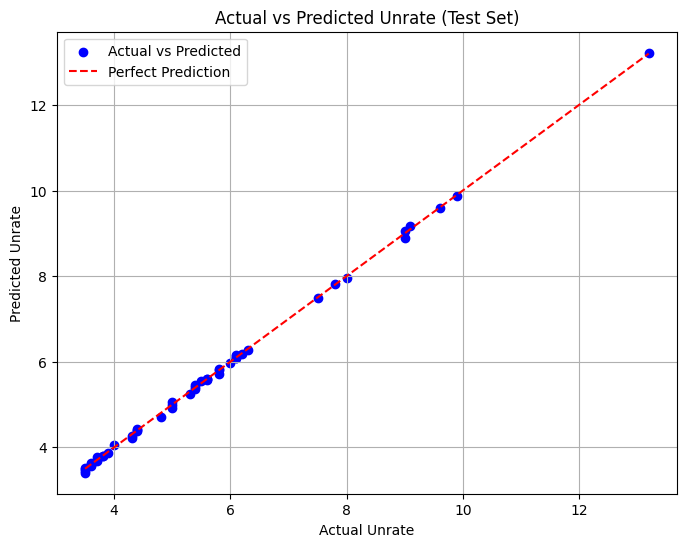

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted unrate for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Unrate (Test Set)')
plt.xlabel('Actual Unrate')
plt.ylabel('Predicted Unrate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(y_test, y_test_pred)

# Print the correlation coefficient
print("Correlation Coefficient (r):", correlation_coefficient)


Correlation Coefficient (r): 0.9997806260469654


In [ ]:
# Extracting the intercept and coefficients
intercept = svm_model.intercept_
coefficients = svm_model.dual_coef_

# Display the equation
equation = f'y = {intercept[0]:.2f}'
for i, coef in enumerate(coefficients[0]):
    equation += f' + ({coef:.2f} * {X.columns[i]})'

print("Support Vector Regression Prediction Equation:")
print(equation)


Support Vector Regression Prediction Equation:
y = 0.03 + (-0.29 * unrate_white) + (0.09 * unrate_asian) + (-0.05 * unrate_black) + (0.01 * unrate_hispanic) + (0.24 * unrate_women) + (-0.01 * unrate_men)


Lasso Regressiom

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

# Load data
data = pd.read_csv('data.csv')

# Define features and target
X = data[['unrate_white', 'unrate_asian', 'unrate_black', 'unrate_hispanic']]
y = data['unrate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso()

# Define hyperparameters for grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Perform grid search
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best Lasso model
best_lasso = grid_search.best_estimator_

# Fit the best Lasso model
best_lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_lasso.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"The Mean Squared Error on the test set is: {mse}")

# Coefficients of the Lasso regression model
coefficients = best_lasso.coef_
intercept = best_lasso.intercept_

# Create a DataFrame for the summary table
summary_table = pd.DataFrame({
    'Feature': list(X.columns),
    'Coefficient': coefficients,
})

# Convert DataFrame to tabular form
table = tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)


The Mean Squared Error on the test set is: 0.0026847759068926646
+-----------------+---------------------+
|     Feature     |     Coefficient     |
+-----------------+---------------------+
|  unrate_white   | 1.5723606081298658  |
|  unrate_asian   | 0.11064980686739331 |
|  unrate_black   | 0.3441785030072755  |
| unrate_hispanic | 0.03332027950862117 |
+-----------------+---------------------+


In [ ]:
# Get the coefficients and the intercept from the best Lasso model
coefficients = best_lasso.coef_
intercept = best_lasso.intercept_

# Feature names for constructing the equation string
feature_names = X.columns

# Constructing the prediction equation string
equation_parts = [f"{intercept:.2f}"]  # Start with the intercept, formatted to 2 decimal places
equation_parts += [f"+ {coef:.2f} * {name}" if coef >= 0 else f"- {-coef:.2f} * {name}"
                   for coef, name in zip(coefficients, feature_names)]

# Join all parts into the full equation string, adjusting signs for readability
prediction_equation = " ".join(equation_parts).replace("+ -", "- ")

# Print the prediction equation
print("Predicted y = " + prediction_equation)


Predicted y = 5.97 + 1.57 * unrate_white + 0.11 * unrate_asian + 0.34 * unrate_black + 0.03 * unrate_hispanic


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

# Load data
data = pd.read_csv('data.csv')

# Define features and target
X = data[['unrate_women', 'unrate_men']]
y = data['unrate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso()

# Define hyperparameters for grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Perform grid search
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best Lasso model
best_lasso = grid_search.best_estimator_

# Fit the best Lasso model
best_lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_lasso.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"The Mean Squared Error on the test set is: {mse}")

# Coefficients of the Lasso regression model
coefficients = best_lasso.coef_
intercept = best_lasso.intercept_

# Create a DataFrame for the summary table
summary_table = pd.DataFrame({
    'Feature': list(X.columns),
    'Coefficient': coefficients,
})

# Convert DataFrame to tabular form
table = tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)


The Mean Squared Error on the test set is: 0.0012467618365065776
+--------------+--------------------+
|   Feature    |    Coefficient     |
+--------------+--------------------+
| unrate_women | 0.8819576990492806 |
|  unrate_men  | 1.174284696965023  |
+--------------+--------------------+


In [ ]:
# Get the coefficients and the intercept from the best Lasso model
coefficients = best_lasso.coef_
intercept = best_lasso.intercept_

# Feature names for constructing the equation string
feature_names = X.columns

# Constructing the prediction equation string
equation_parts = [f"{intercept:.2f}"]  # Start with the intercept, formatted to 2 decimal places
equation_parts += [f"{coef:.2f} * {name}" if coef >= 0 else f"- {-coef:.2f} * {name}"
                   for coef, name in zip(coefficients, feature_names)]

# Join all parts into the full equation string
prediction_equation = " + ".join(equation_parts).replace("+ -", "- ")

# Print the prediction equation
print("Predicted y = " + prediction_equation)


Predicted y = 5.97 + 0.88 * unrate_women + 1.17 * unrate_men


# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('data.csv')

# Selecting the features and target
features = data[['unrate_white', 'unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_women', 'unrate_men']]
target = data['unrate']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the SVM model with a linear kernel
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Coefficients (weights) and intercept from the SVM model
coefficients = svm_model.coef_[0]
intercept = svm_model.intercept_[0]

# Function to predict using the derived coefficients and intercept
def predict_unrate(input_features):
    # Input features should be a pandas DataFrame with the same structure as the training data
    scaled_features = scaler.transform(input_features)
    prediction = (coefficients * scaled_features).sum(axis=1) + intercept
    return prediction

# Example usage
# example_data = pd.DataFrame({
#     'unrate_white': [5.2],
#     'unrate_asian': [5.5],
#     'unrate_black': [10.5],
#     'unrate_hispanic': [7.9],
#     'unrate_women': [5.4],
#     'unrate_men': [6.2]
# })

# predicted_unrate = predict_unrate(example_data)
# print("Predicted Unemployment Rate:", predicted_unrate)


Predicted Unemployment Rate: [5.90006954]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from tabulate import tabulate

# Loading data
data = pd.read_csv('data.csv')

# Selecting the features and target
features = data[['unrate_white', 'unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_women', 'unrate_men']]
target = data['unrate']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Coefficients from the trained SVM model
coefficients = svm_model.coef_[0]

# Create a DataFrame for the summary table
summary_table = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': coefficients,
})

# Convert DataFrame to tabular form
table = tabulate(summary_table, headers='keys', tablefmt='pretty', showindex=False)

# Display the table
print(table)

# Predicting on the test set using the trained SVM model
y_pred = svm_model.predict(X_test_scaled)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"The Mean Squared Error on the test set is: {mse}")

# Define the features in the same order as they were used for training
feature_names = ['unrate_white', 'unrate_asian', 'unrate_black', 'unrate_hispanic', 'unrate_women', 'unrate_men']
coefficients = svm_model.coef_[0]
intercept = svm_model.intercept_[0]

# Create the SVM prediction equation as a string
terms = " + ".join([f"{coeff:.3f} * {feature}" for coeff, feature in zip(coefficients, feature_names)])
svm_prediction_equation = f"{terms} + {intercept:.3f}"

# This is your SVM prediction equation
print("SVM Prediction Equation:")
print(svm_prediction_equation)


+-----------------+---------------------+
|     Feature     |     Coefficient     |
+-----------------+---------------------+
|  unrate_white   | 0.5480568795759815  |
|  unrate_asian   | 0.0195624145399233  |
|  unrate_black   | 0.18993989901285213 |
| unrate_hispanic | 0.2115305311424771  |
|  unrate_women   | 0.5330333774308481  |
|   unrate_men    | 0.5653245886489562  |
+-----------------+---------------------+
The Mean Squared Error on the test set is: 0.001789599487730403
SVM Prediction Equation:
0.548 * unrate_white + 0.020 * unrate_asian + 0.190 * unrate_black + 0.212 * unrate_hispanic + 0.533 * unrate_women + 0.565 * unrate_men + 5.964


# **Hypothesis Testing Z-test**

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')

In [ ]:
from scipy import stats

def one_sample_z_test(data, mu, sigma, alpha=0.05, alternative='two-sided'):

    z_stat = (data.mean() - mu) / (sigma / (len(data)**0.5))

    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    elif alternative == 'greater':
        p_value = 1 - stats.norm.cdf(z_stat)
    elif alternative == 'less':
        p_value = stats.norm.cdf(z_stat)
    else:
        raise ValueError("Alternative must be 'two-sided', 'greater', or 'less'.")

    return z_stat, p_value, alternative

In [ ]:
import numpy as np
mean_unrate_men = np.mean(data["unrate_men"])
std_dev_unrate_men = np.std(data["unrate_men"])
mean_unrate_women = np.mean(data["unrate_women"])
std_dev_unrate_women = np.std(data["unrate_women"])

z_stat, p_value, alternative = one_sample_z_test(data["unrate_men"], mu=mean_unrate_women, sigma=std_dev_unrate_women, alternative='greater')

alpha = 0.05  # Significance level

print("Z-statistic:", z_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Since P-value is less than Significance level")
    print("There is sufficient evidence to suggest that male workers have a higher unemployment rate than female workers.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that male workers have a higher unemployment rate than female workers.")


Z-statistic: 3.3751363637679934
P-value: 0.00036889561632946766
Reject the null hypothesis.
Since P-value is less than Significance level
There is sufficient evidence to suggest that male workers have a higher unemployment rate than female workers.
